In [1]:
#module imports
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import geoplot
# SG map from
# https://mapcruzin.com/free-singapore-country-city-place-gis-shapefiles.htm

In [2]:
#data ingest
Stops = gp.read_file(
    '../Data/TrainStation_Oct2017/MRTLRTStnPtt.shp'
)

Background = gp.read_file(
    '../data/national-map-polygon/SG_FROM_KML_BUFF.shp'
)
Price = pd.read_csv(
    '../Intermediates/AllCleaned.csv'
)
Stops = Stops.to_crs(Background.crs)

In [3]:
#Filter To current only get Target
#CC24 is Kent Ridge MRT
TargetStation = 'CC24'
ThisPrice = Price.loc[Price['ExitSign'] == TargetStation]

In [4]:
#merge
ThisPrice['STN_NAME'] = ThisPrice['EnterName'].str.upper()
Stops['STN_NAME'] = Stops['STN_NAME'].str.split(' MRT').str[0].str.split(' LRT').str[0]

newdf = pd.merge(
    left = Stops,
    right = ThisPrice,
    on = 'STN_NAME',
    how='right'
)
#there are some repeated stations in the scraped data, so we need to drop them
newdf = newdf.drop_duplicates(subset=['STN_NAME'],keep='first')

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


4008
3336
4344
4344
2688
3912
3720
1992
3816
4536
4584
4584
4416
4656
2472
3720
3720
4488
3816
3096
2232
4488
4200
4536
4344
3624
4416
1992
1992
4584
4104
3432
3624
3528
4416
4272
4008
3432
4344
3912
4488
4416
4344
4416
4344
3816
4008
4416
4536
4536
4488
4536
4536
4488
3912
4488
4488
4536
3912
3912
3816
3912
3912
4416
4416
4488
4344
4488
4488
4488
4416
3912
4008
4416
4416
4344
4344
3912
4008
4272
3432
4008
3432
4632
4488
3816
3624
3432
2928
3528
3432
0
3240
1992
3528
3720
3336
3240
3528
3432
3816
3912
3336
2232
3336
3528
3528
3240
3432
2232
3240
3096
2688
2928
3624
3240
3912
4104
3336
4200
4272
3336
3816
3720
3240
4416
3624
3336
3912
3912
1992
3096
3336
2472
3336
1992
3720
3528
4008
3336
3240
2688
3720
3096
3432
3624
4104
3432
4536
4680
3432
4200
3336
1992
2472
3336
4008
3336
4344
4344
2688
3912
3720
1992
3816
4536
4584
4584
4416
4656
2472
3720
3720
4488
3816
3096
2232
4488
4200
4536
4344
3624
4416
1992
1992
4584
4104
3432
3624
3528
4416
4272
4008
3432
4344
3912
4488
4416
4344
4416
434

6680
5560
7240
7240
4480
6520
6200
3320
6360
7560
7640
7640
7360
7760
4120
6200
6200
7480
6360
5160
3720
7480
7000
7560
7240
6040
7360
3320
3320
7640
6840
5720
6040
5880
7360
7120
6680
5720
7240
6520
7480
7360
7240
7360
7240
6360
6680
7360
7560
7560
7480
7560
7560
7480
6520
7480
7480
7560
6520
6520
6360
6520
6520
7360
7360
7480
7240
7480
7480
7480
7360
6520
6680
7360
7360
7240
7240
6520
6680
7120
5720
6680
5720
7720
7480
6360
6040
5720
4880
5880
5720
0
5400
3320
5880
6200
5560
5400
5880
5720
6360
6520
5560
3720
5560
5880
5880
5400
5720
3720
5400
5160
4480
4880
6040
5400
6520
6840
5560
7000
7120
5560
6360
6200
5400
7360
6040
5560
6520
6520
3320
5160
5560
4120
5560
3320
6200
5880
6680
5560
5400
4480
6200
5160
5720
6040
6840
5720
7560
7800
5720
7000
5560
3320
4120
5560
6680
5560
7240
7240
4480
6520
6200
3320
6360
7560
7640
7640
7360
7760
4120
6200
6200
7480
6360
5160
3720
7480
7000
7560
7240
6040
7360
3320
3320
7640
6840
5720
6040
5880
7360
7120
6680
5720
7240
6520
7480
7360
7240
7360
724

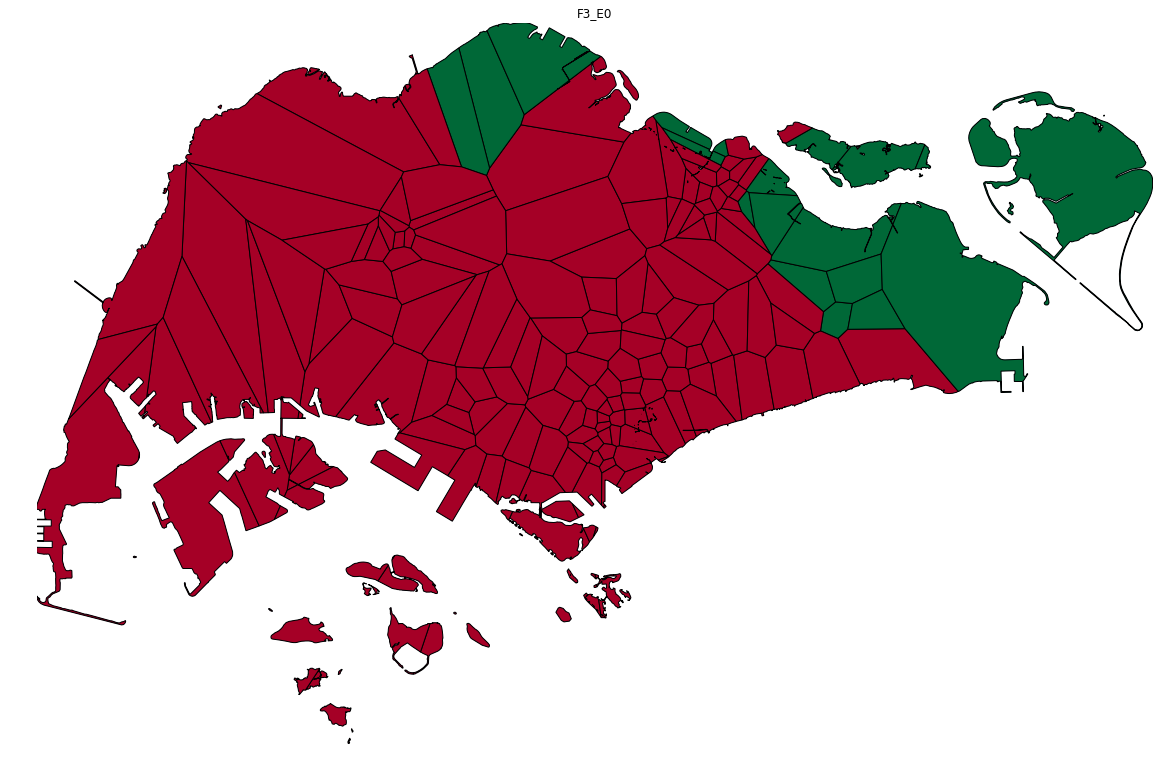

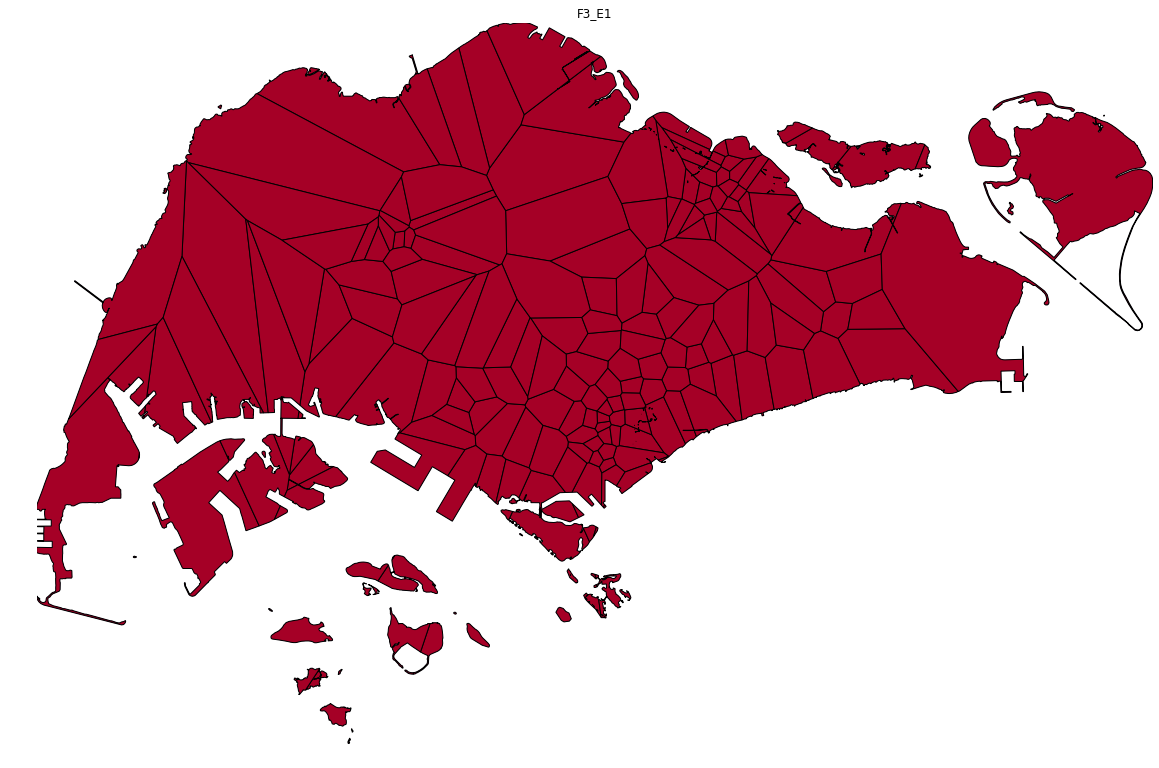

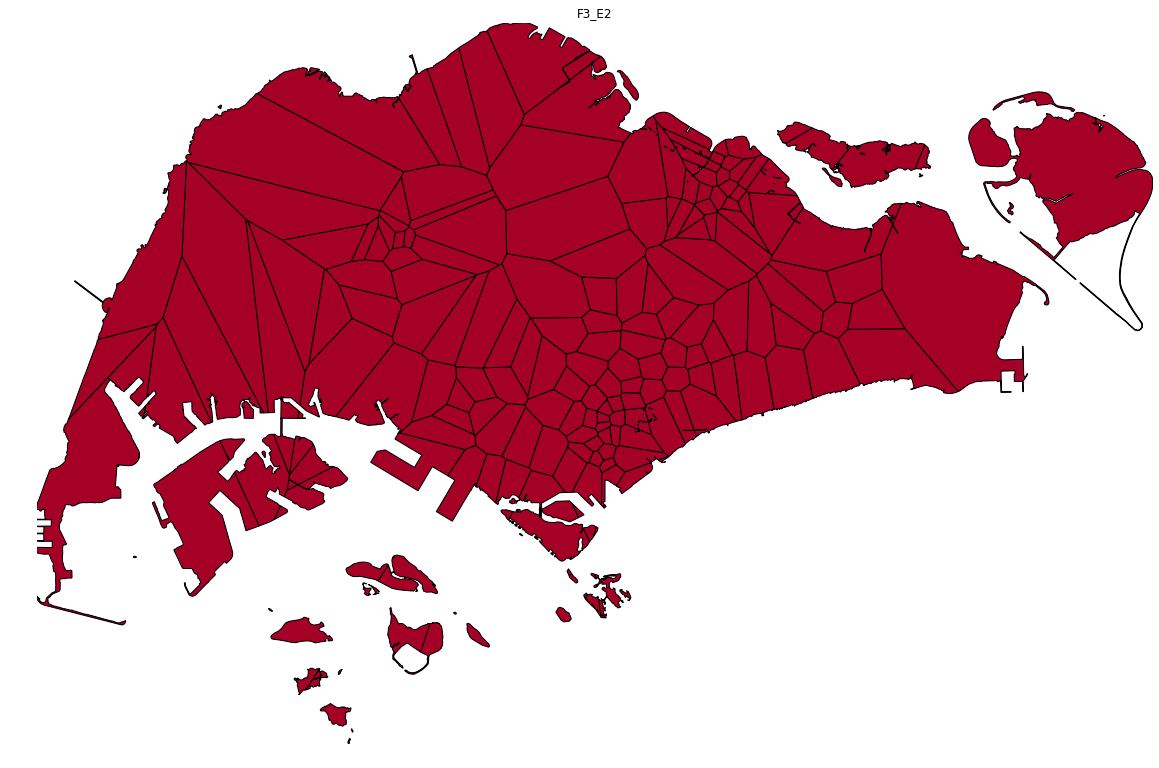

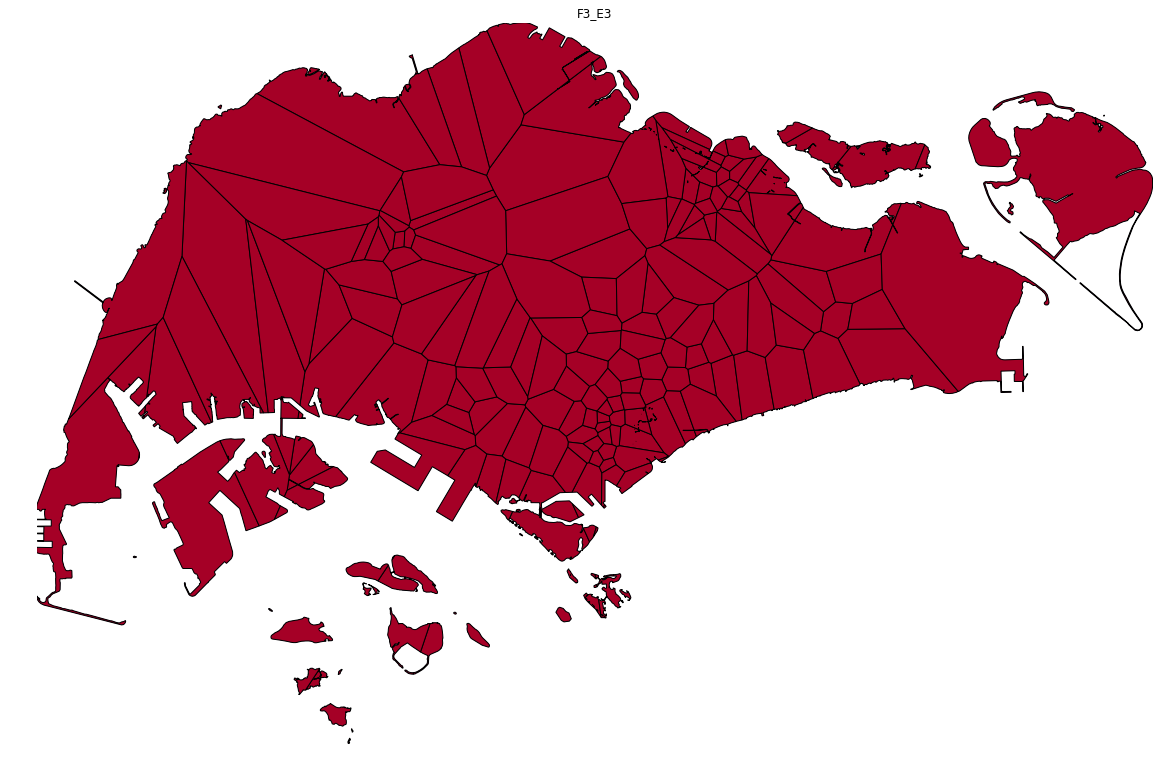

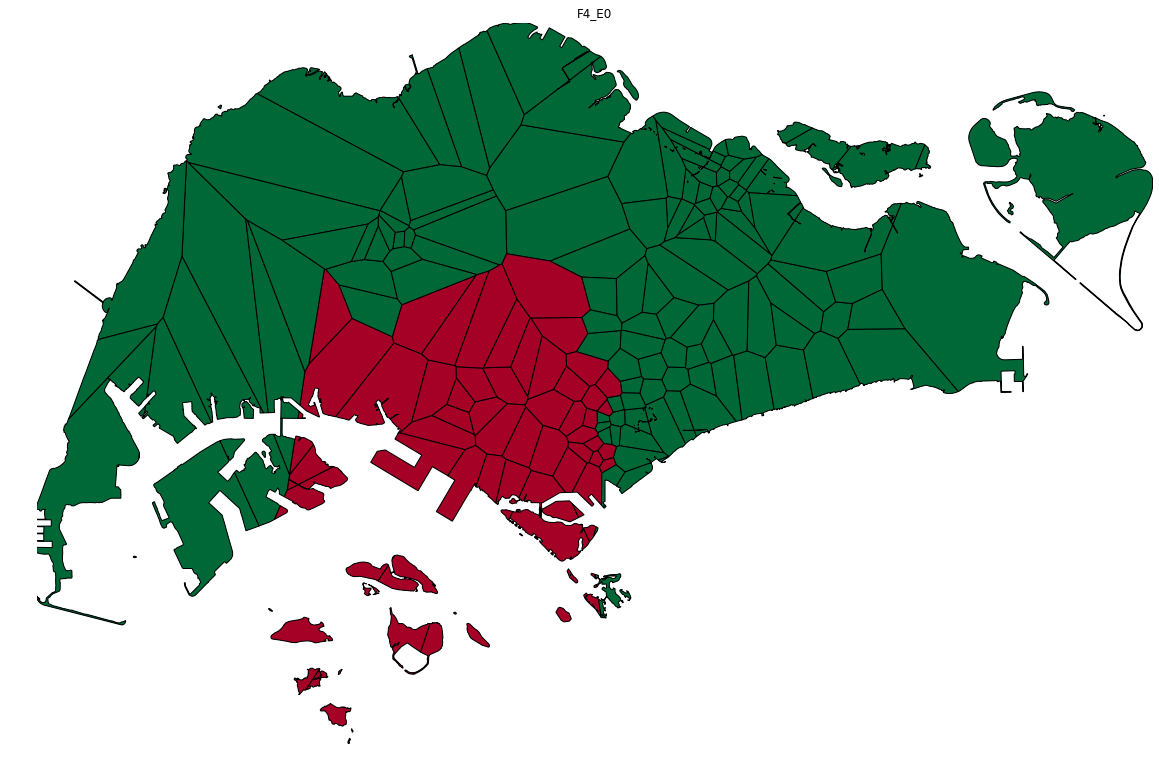

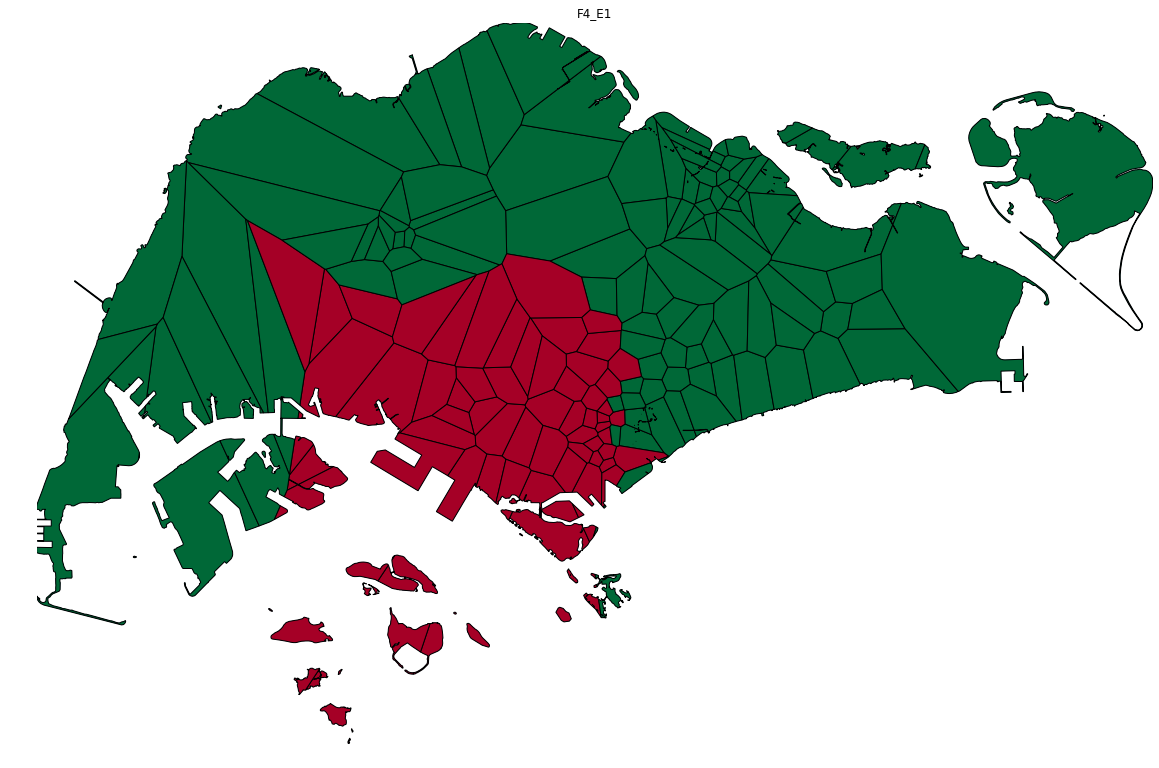

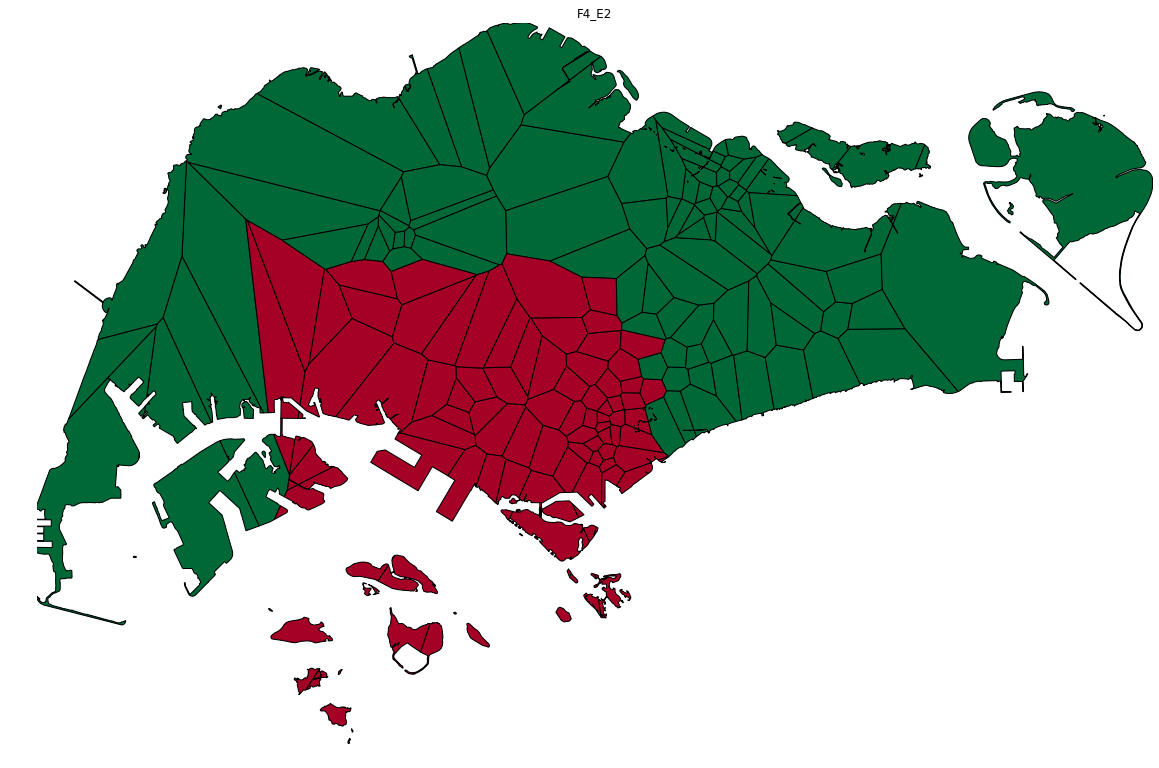

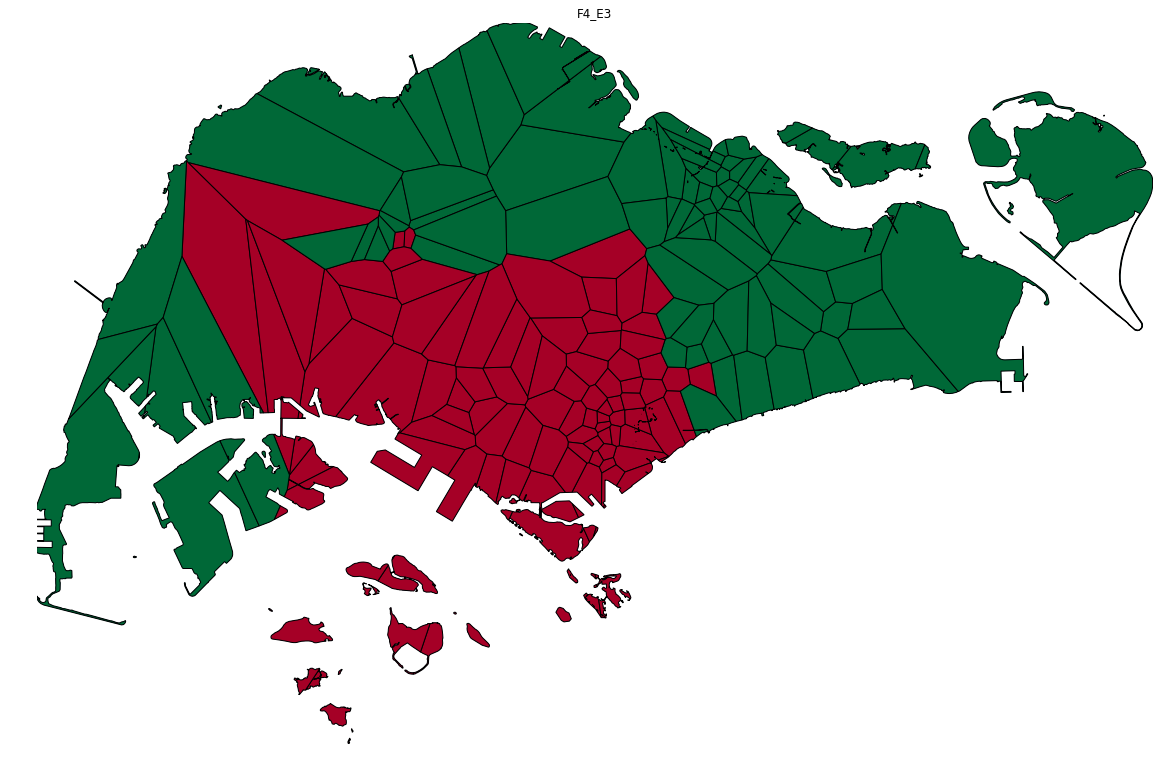

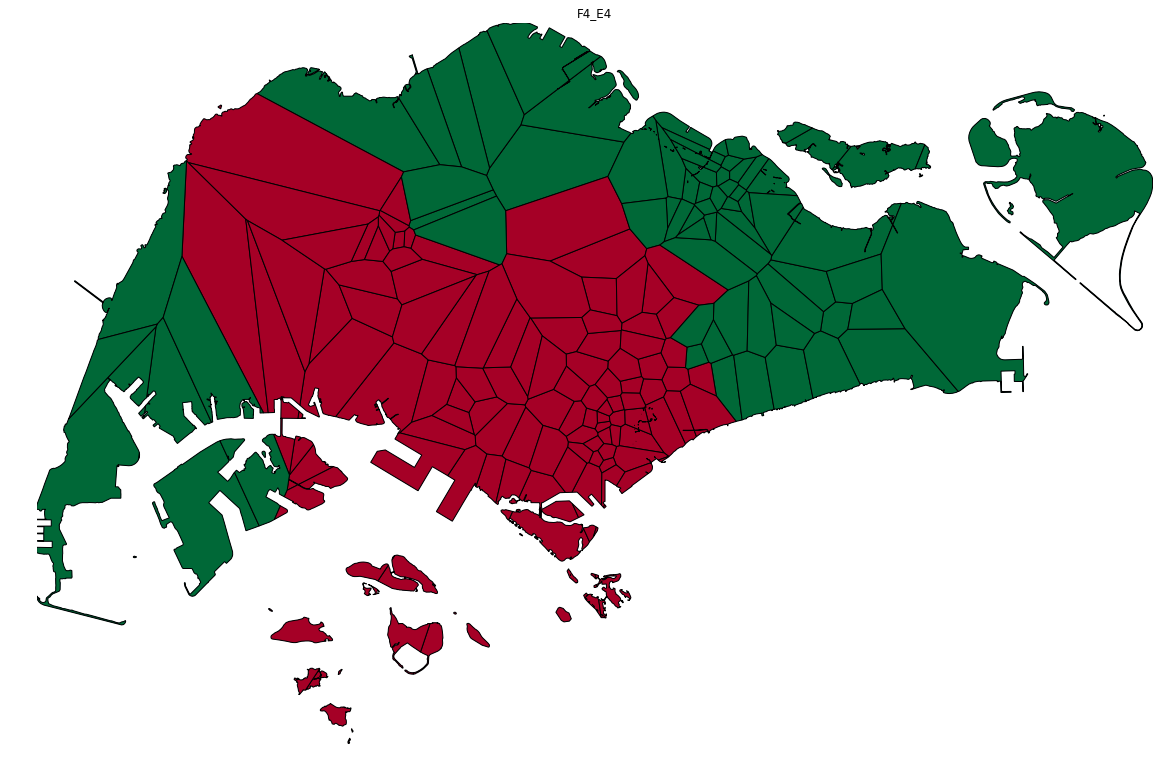

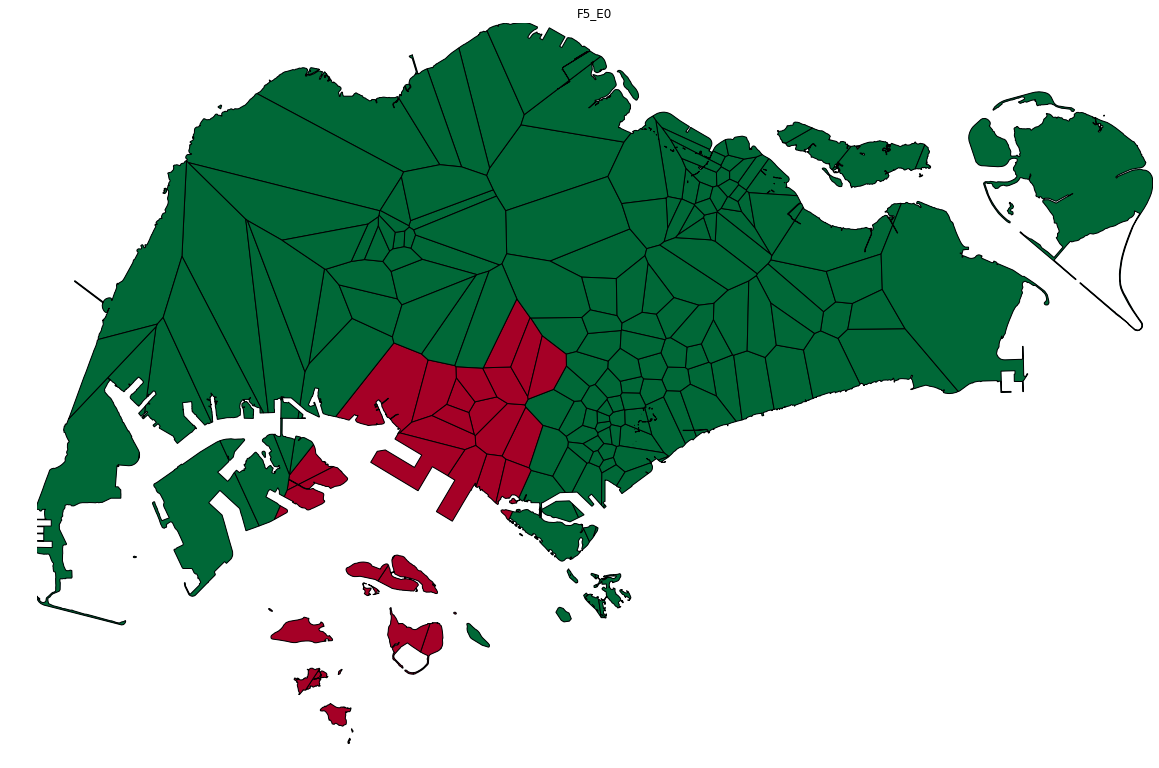

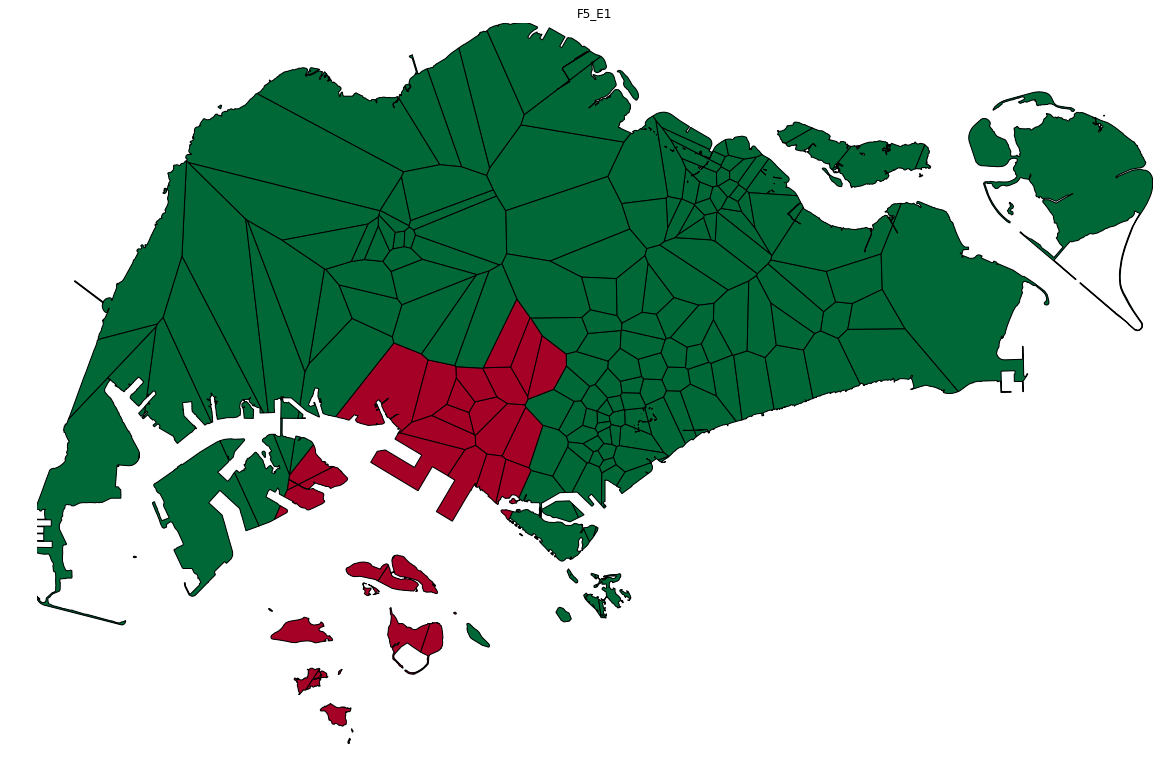

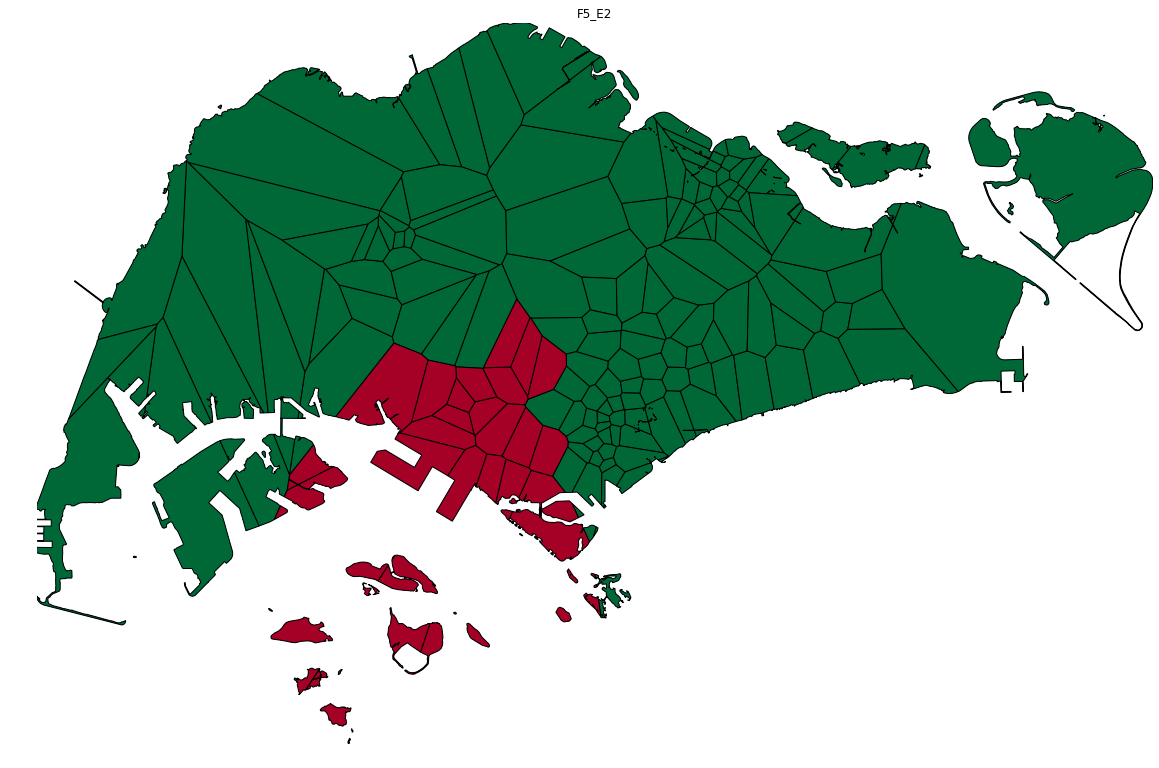

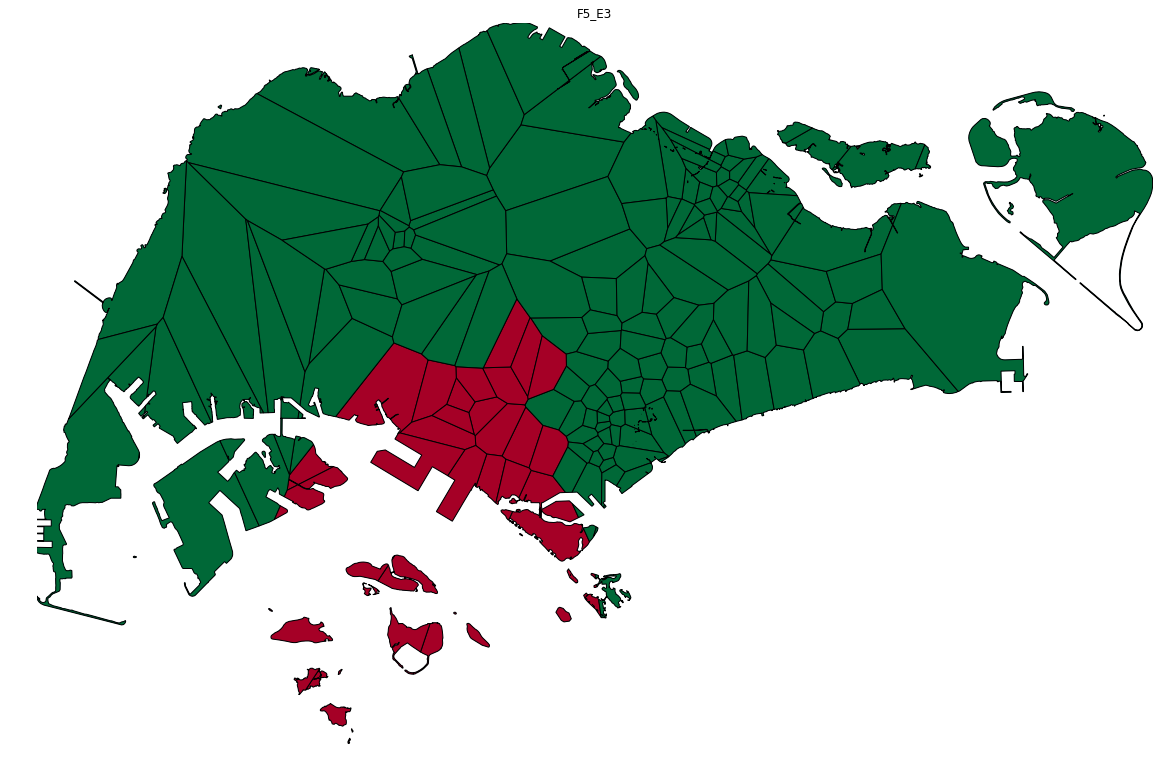

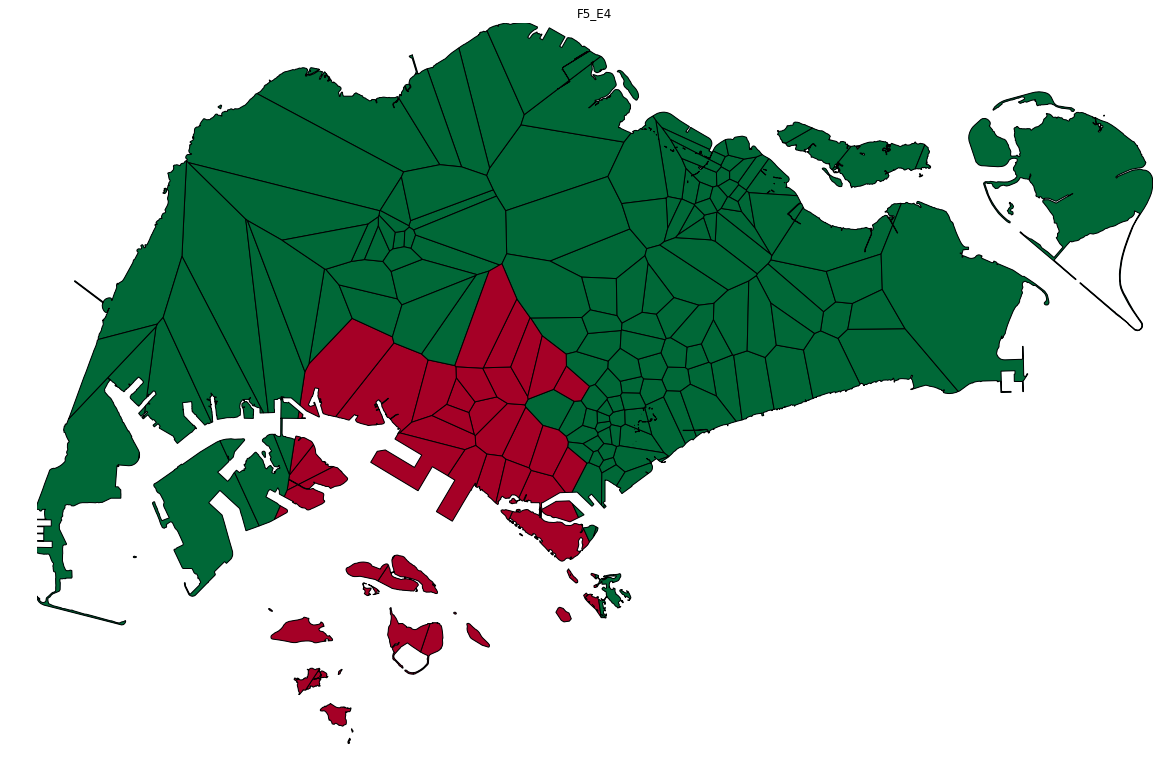

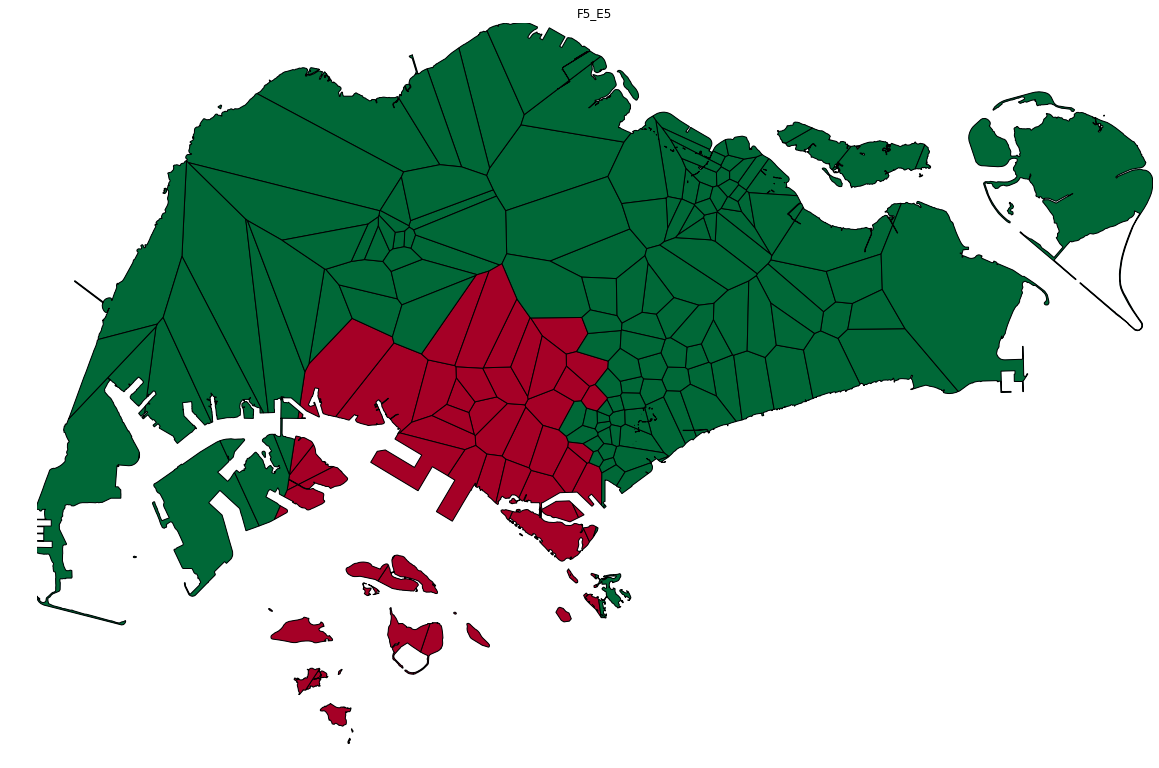

In [14]:
#Collated in a single CSV
for f in [3,4,5]:
    for early in [0,1,2,3,4,5]:
        if early <= f:
            def checkWorth(row):
                #print(row.NormalPrice*times)
                basePrice =  row.NormalPrice*2*f*4
                finalPrice = basePrice - early*4*50
                #print(basePrice)
                return finalPrice>4500

            newdf['F'+str(f)+'_E'+str(early)] = newdf.apply(lambda row: checkWorth(row), axis=1)
            

            fig, ax = plt.subplots(figsize=(20,20))
            geoplot.voronoi(
                newdf,
                ax=ax,
                clip=Background,
                hue=('F'+str(f)+'_E'+str(early)),
                cmap='RdYlGn',
                extent = tuple(Background.total_bounds),
                #figsize=(20,20)
            )

            ax.set_title('F'+str(f)+'_E'+str(early))
            Background.plot(ax=ax)
            #plt.show()
            fig.savefig('./outdata/'+'F'+str(f)+'_E'+str(early))
            

newdf.to_csv('./outdata/collated.csv')

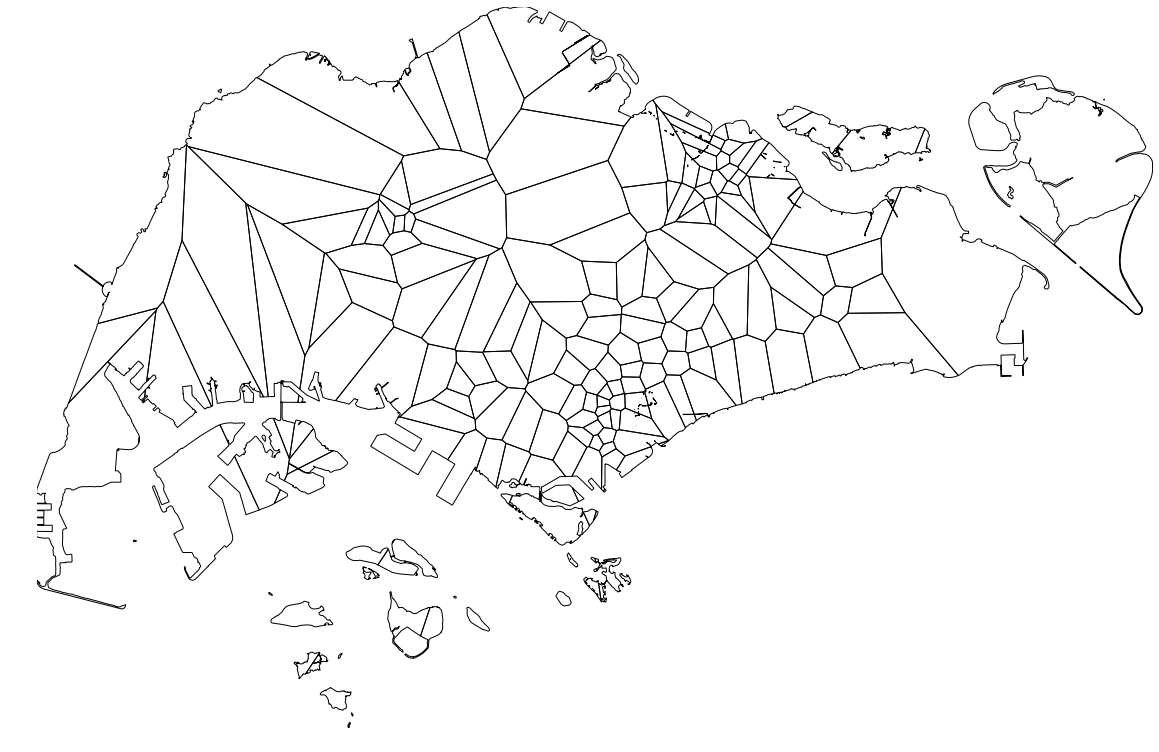

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
geoplot.voronoi(
                newdf,
                ax=ax,
                clip=Background,
                #hue=('F'+str(f)+'_E'+str(early)),
                #cmap='RdYlGn',
                extent = tuple(Background.total_bounds),
)
fig.savefig('./outdata/'+'')

In [8]:
newdf.head()

OBJECTID        STN_NAME STN_NO  \
0         1           EUNOS    EW7   
1         2  CHINESE GARDEN   EW25   
2         3          KHATIB   NS14   
3         4          KRANJI    NS7   
4         5         REDHILL   EW18   

                                      geometry EnterCode       EnterName  \
0  POINT (103.9032524667386 1.319778951553634)     36_36           Eunos   
1  POINT (103.7325967380737 1.342352820874741)     25_25  Chinese Garden   
2  POINT (103.8329799077386 1.417383370153544)     23_23          Khatib   
3  POINT (103.7621654109005 1.425177698770445)     47_47          Kranji   
4   POINT (103.8168166701493 1.28956272640245)     17_17         Redhill   

  EnterSign ExitCode    ExitName ExitSign  ...  F4_E1  F4_E2  F4_E3  F4_E4  \
0       EW7  222_125  Kent Ridge     CC24  ...  False  False  False  False   
1      EW25  222_125  Kent Ridge     CC24  ...  False  False  False  False   
2      NS14  222_125  Kent Ridge     CC24  ...  False  False  False  False   
3       NS7  222_125  Kent Ridge     CC24  ...  False  False  False  False   
4      EW18  222_125  Kent Ridge     CC24  ...  False  False  False  False   

   F5_E0  F5_E1  F5_E2  F5_E3  F5_E4  F5_E5  
0  False  False  False  False  False  False  
1  False  False  False  False  False  False  
2  False  False  False  False  False  False  
3  False  False  False  False  False  False  
4  False  False  False  False  False  False  

[5 rows x 28 columns]

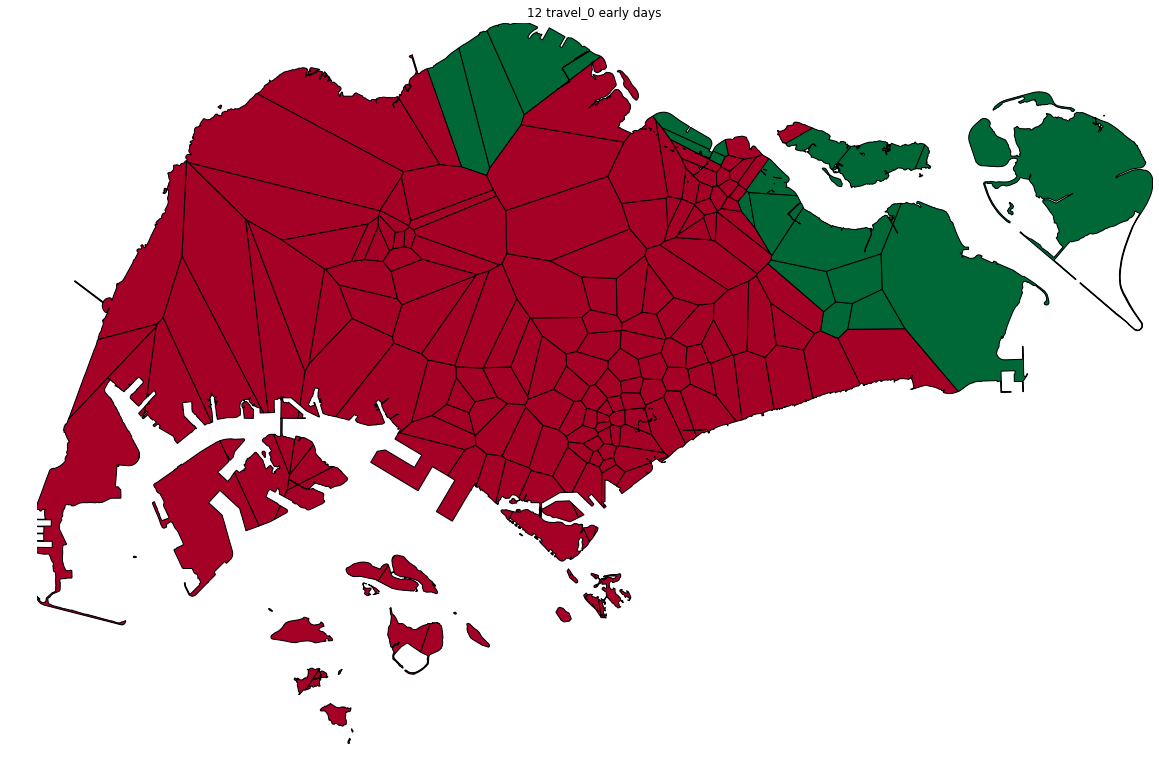

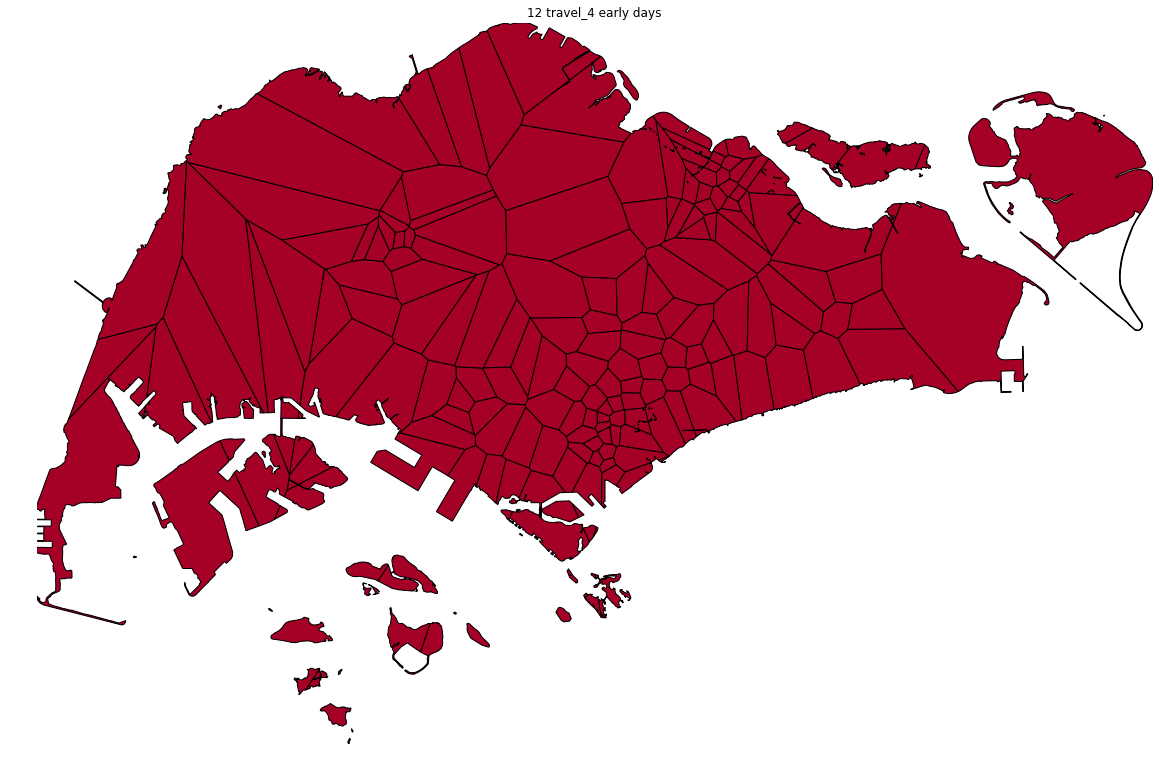

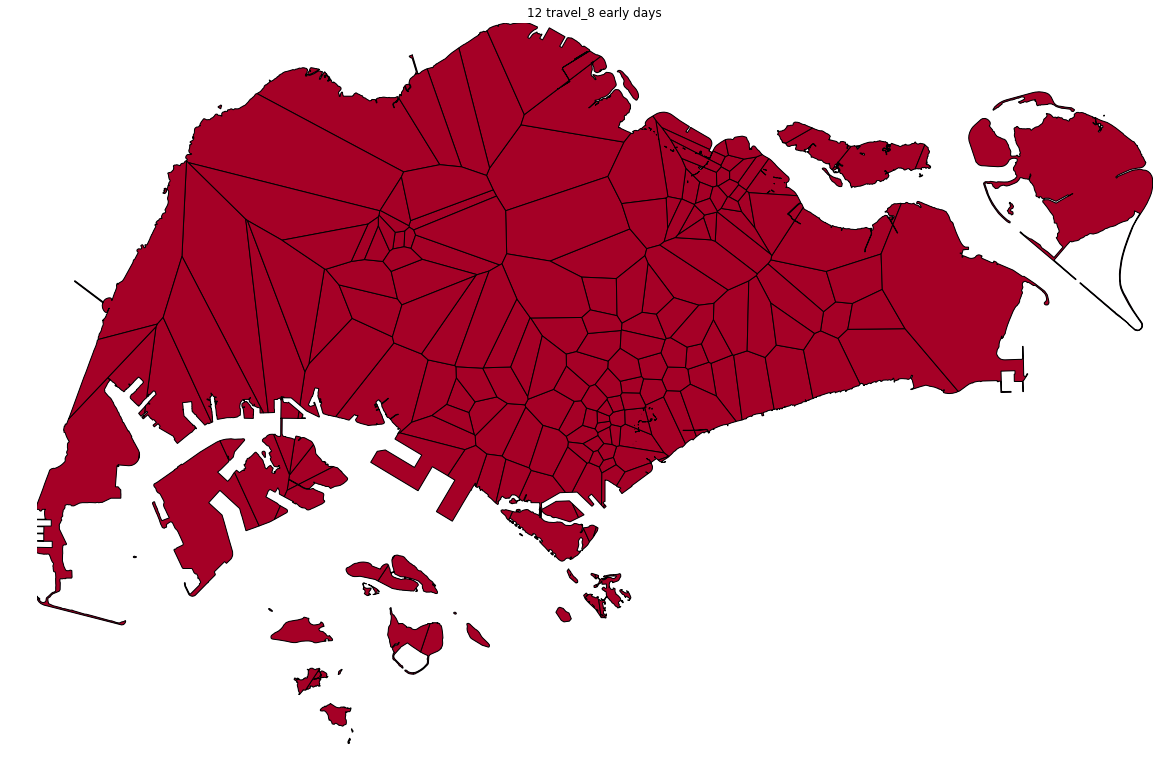

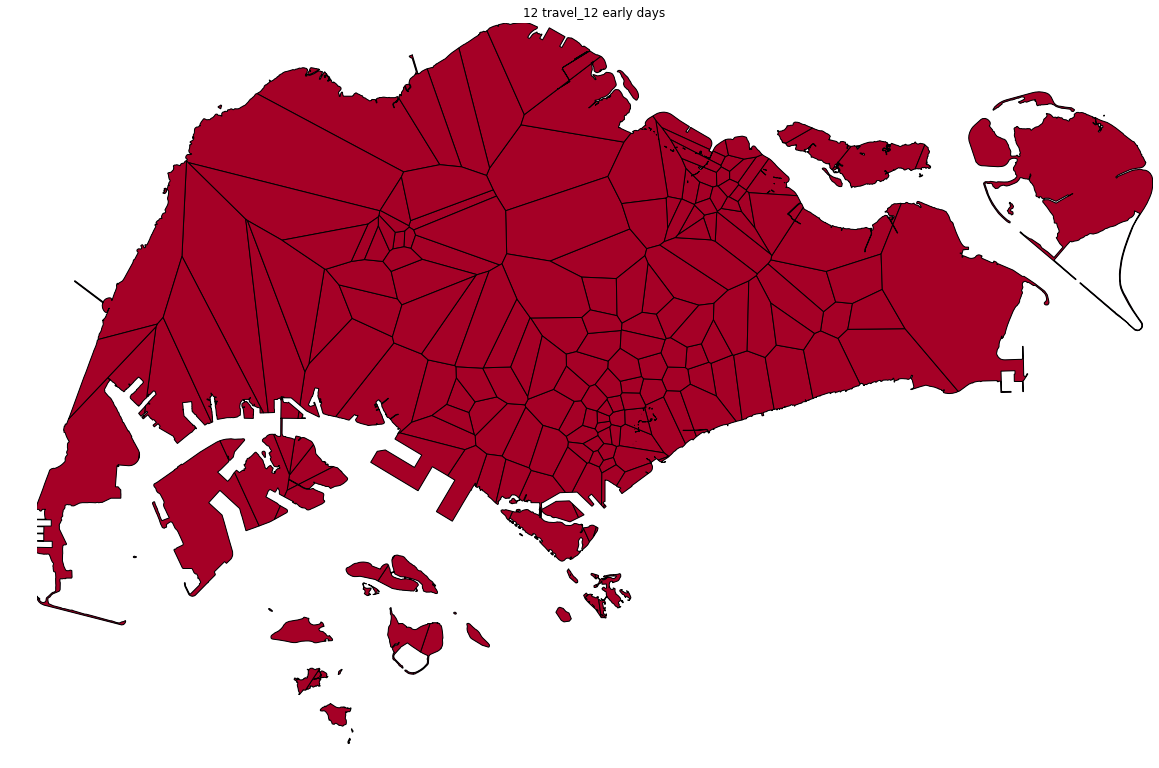

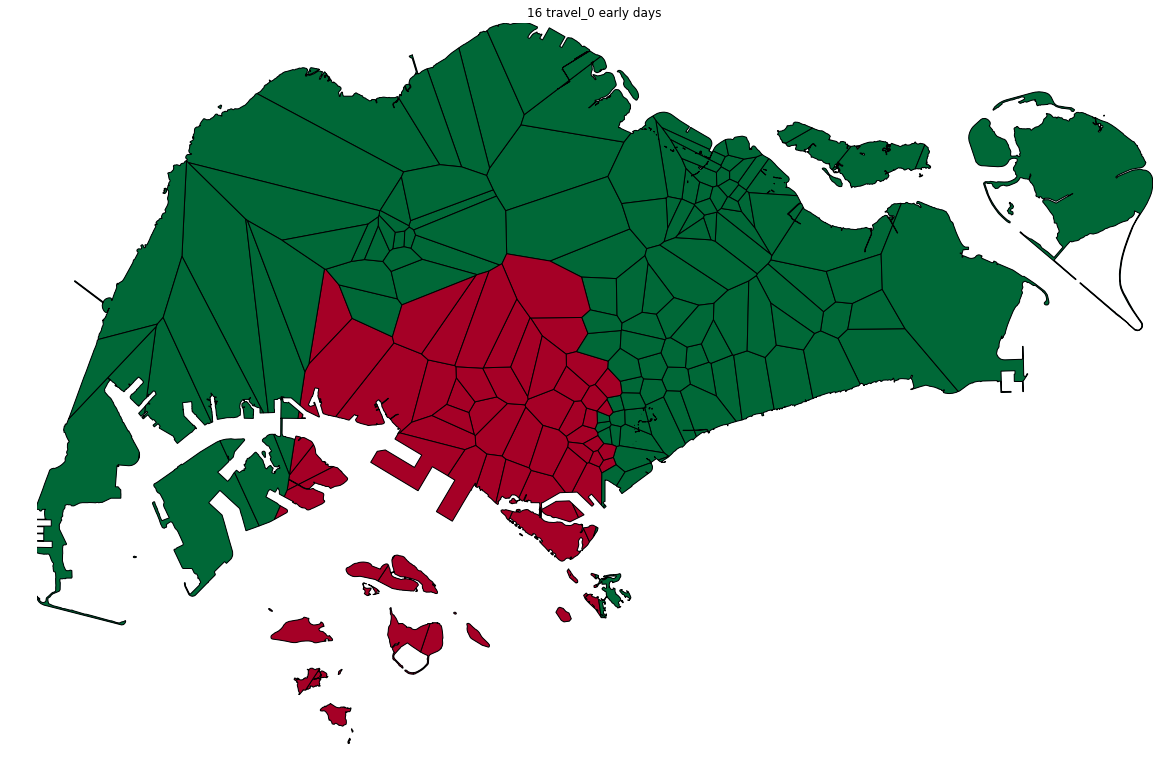

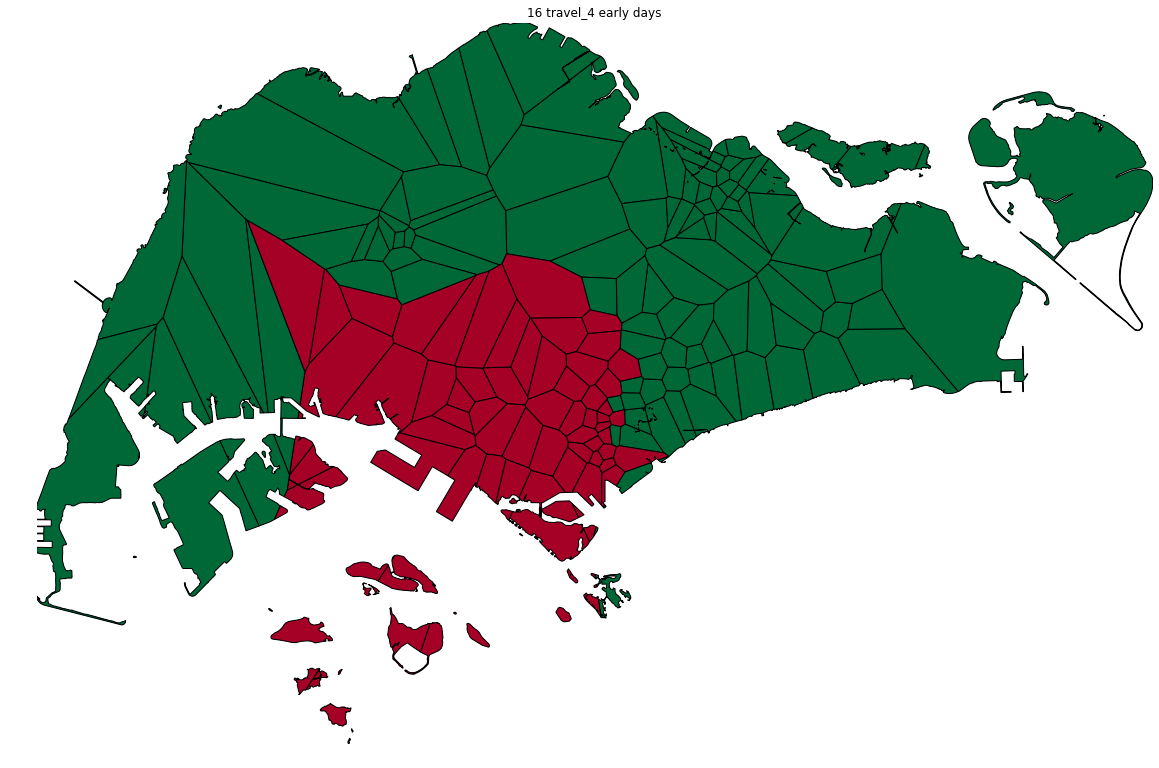

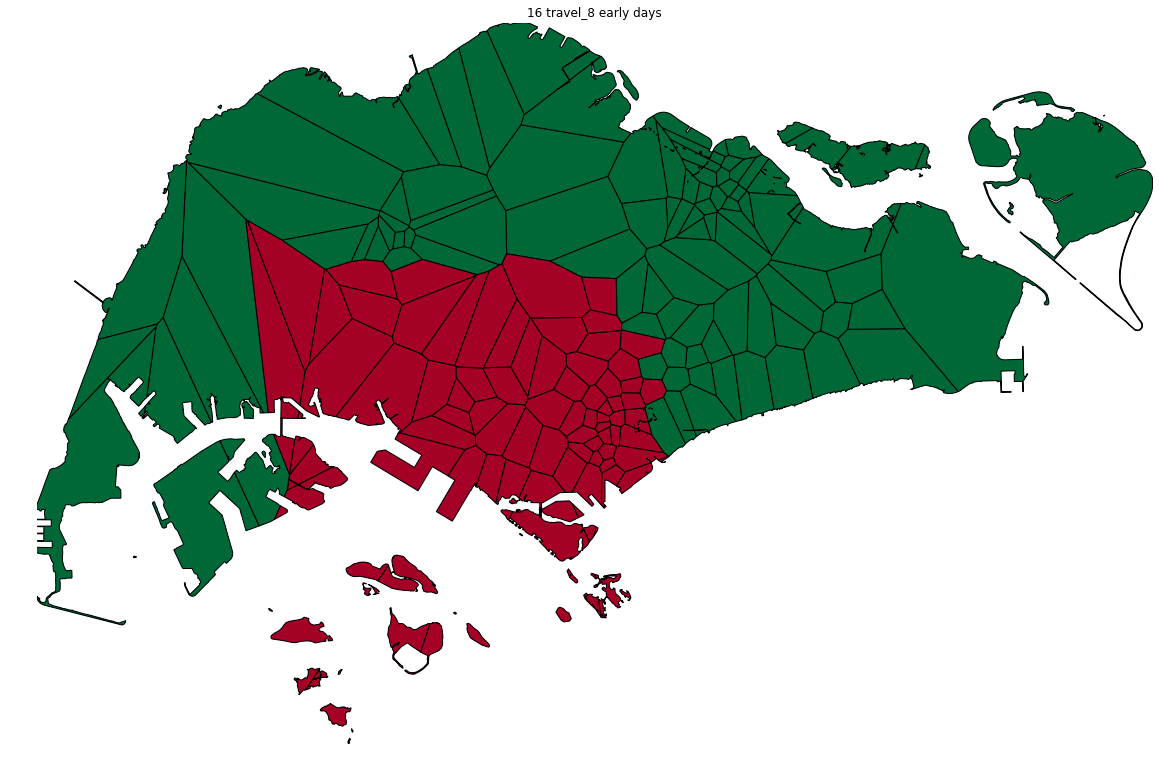

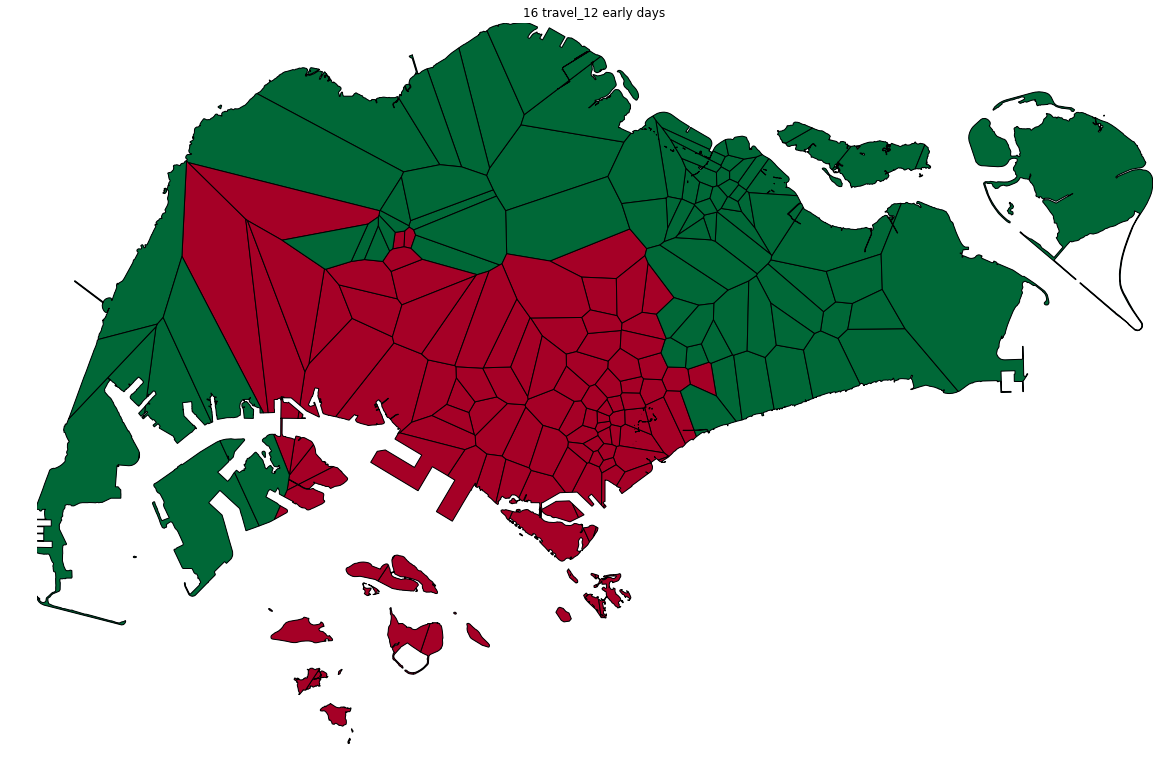

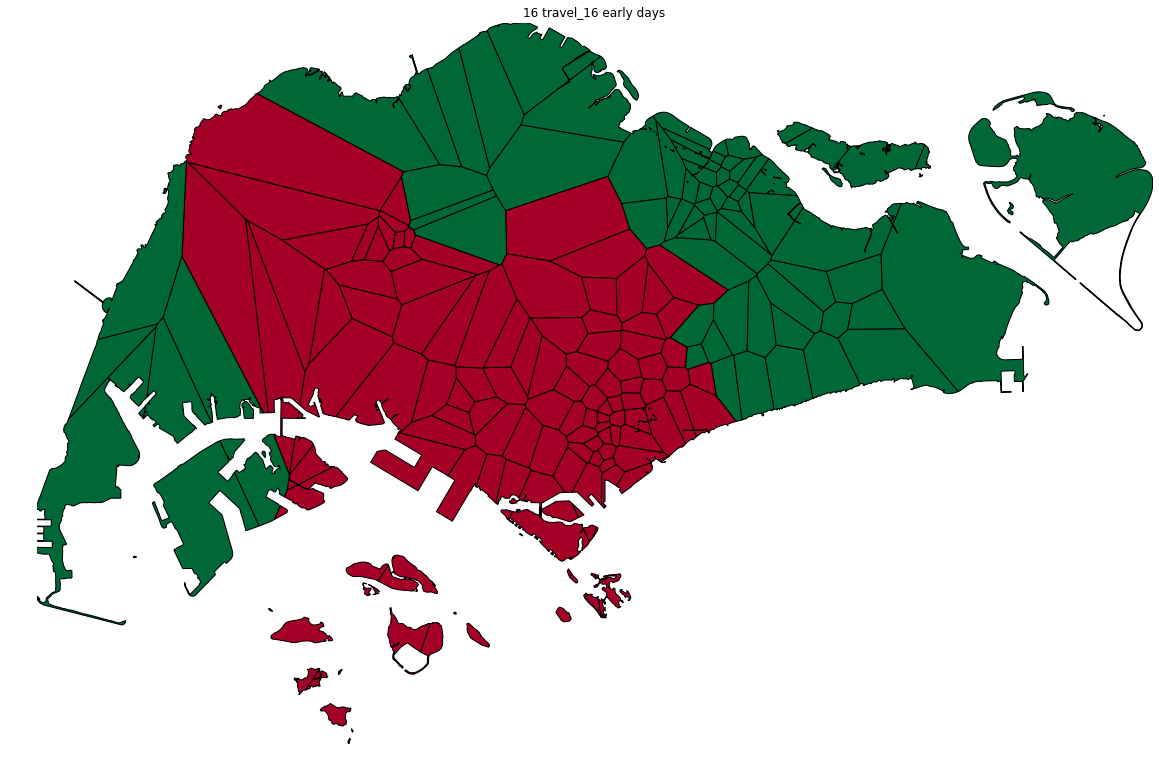

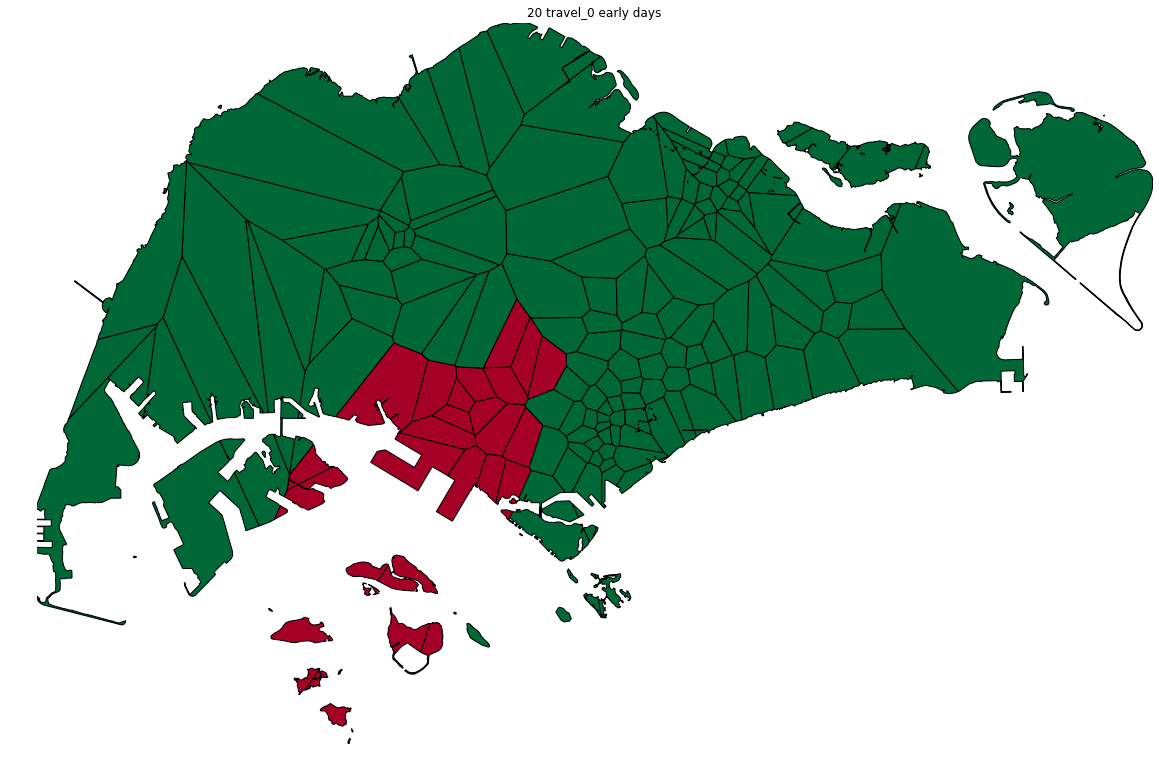

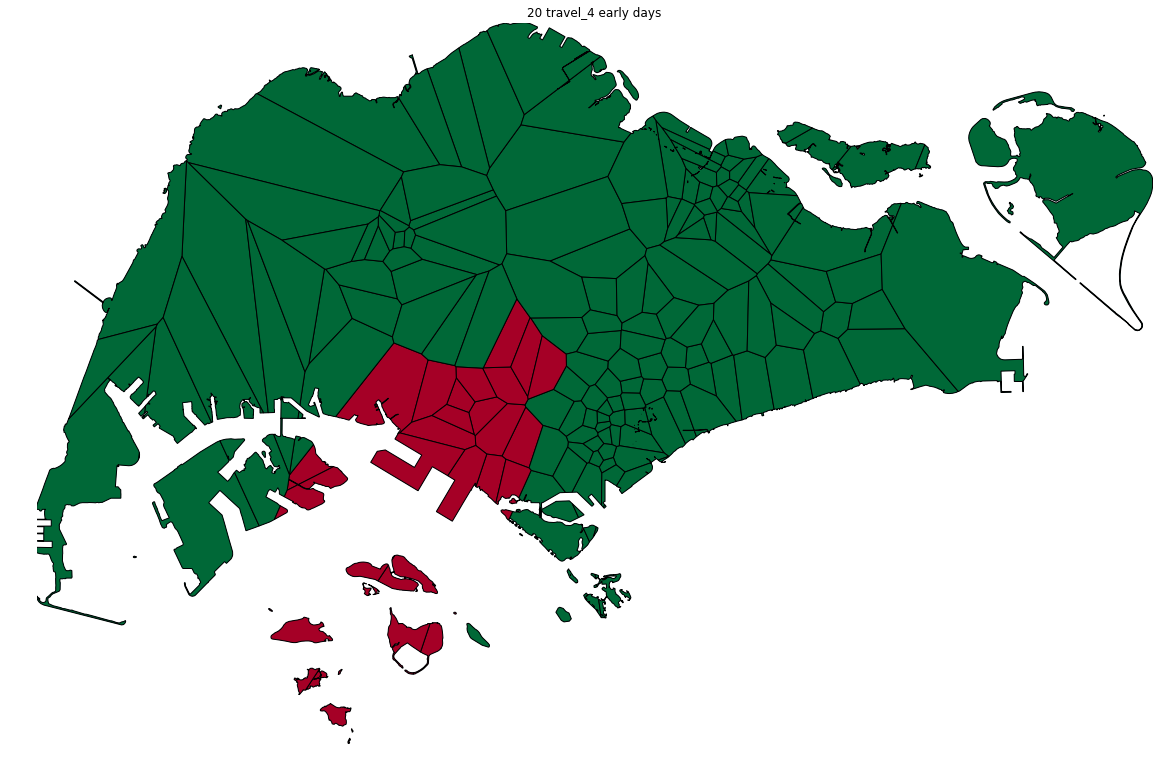

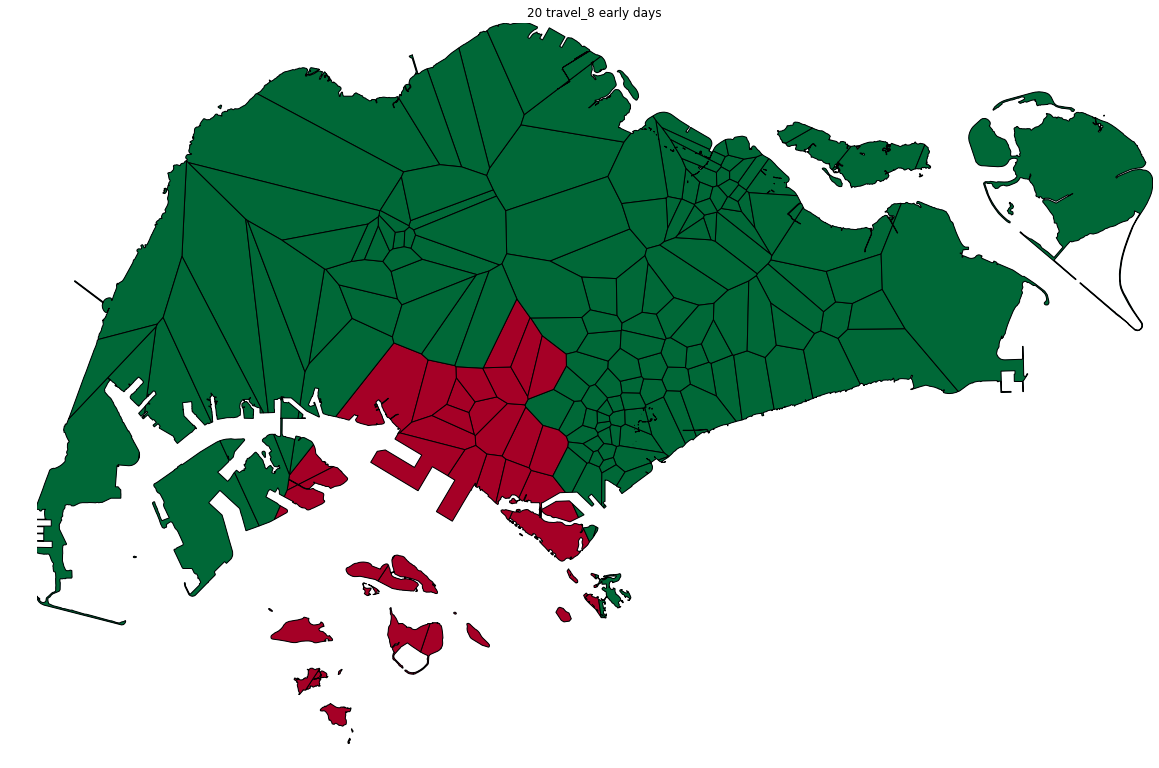

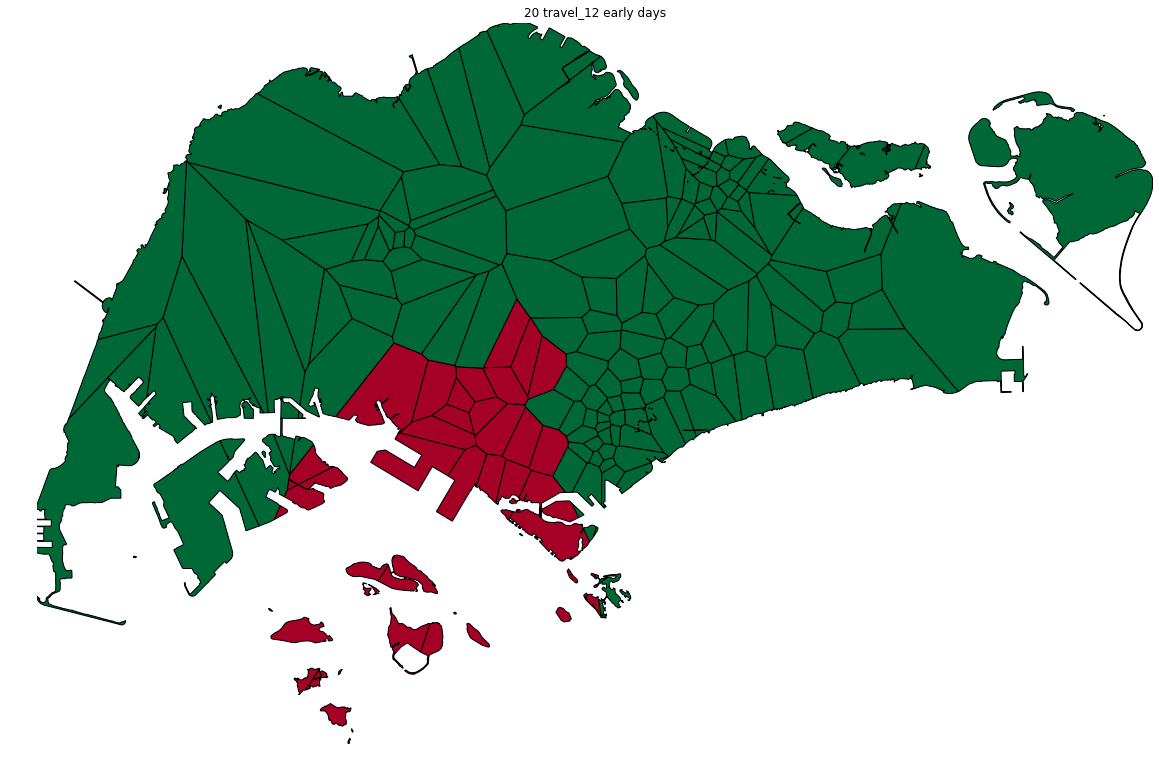

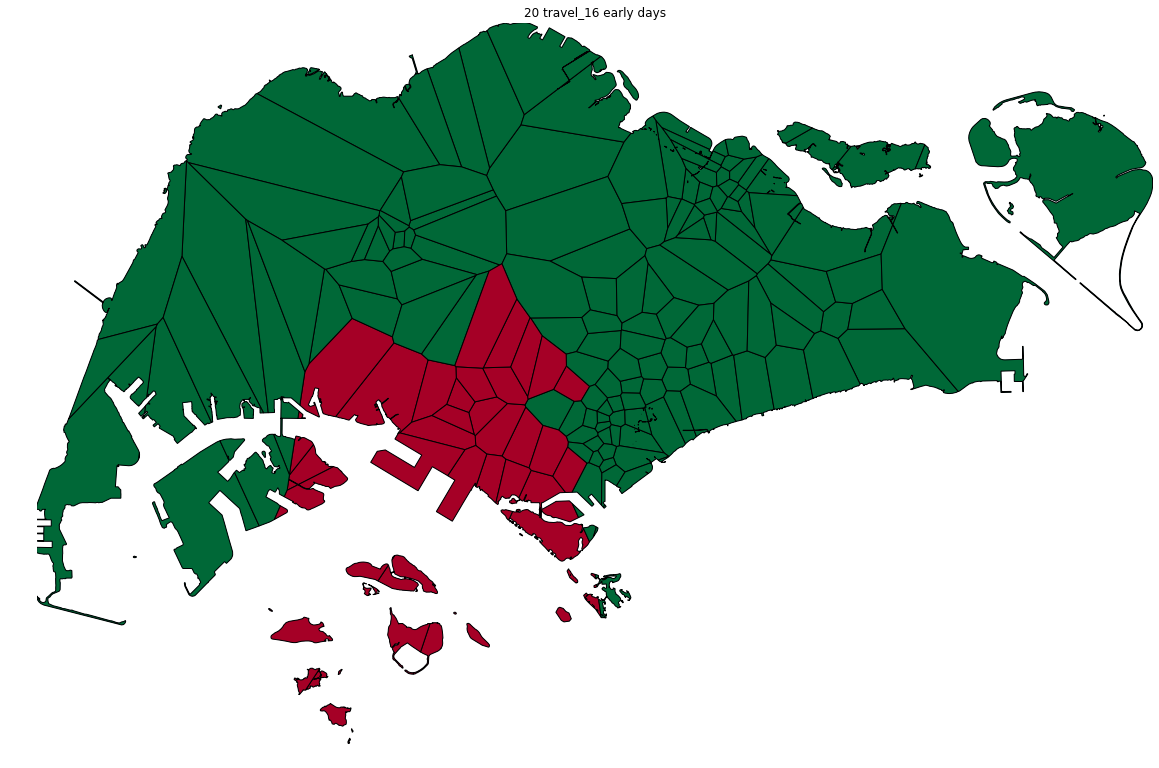

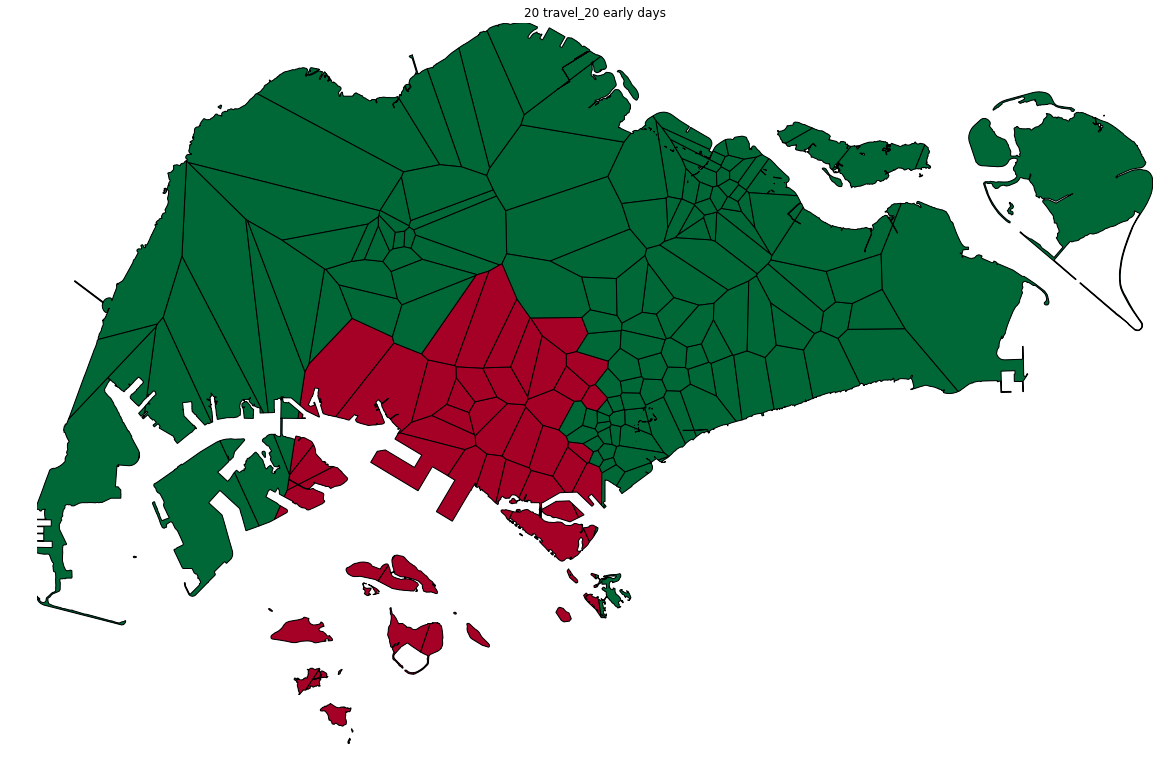

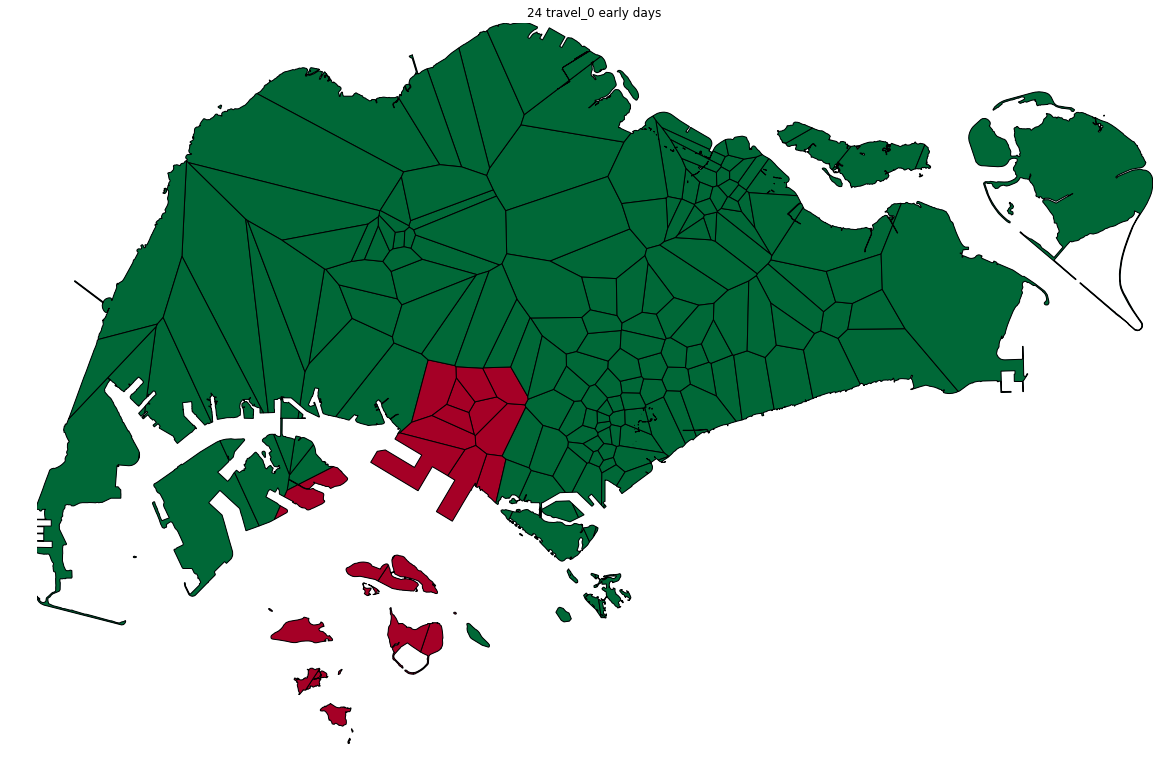

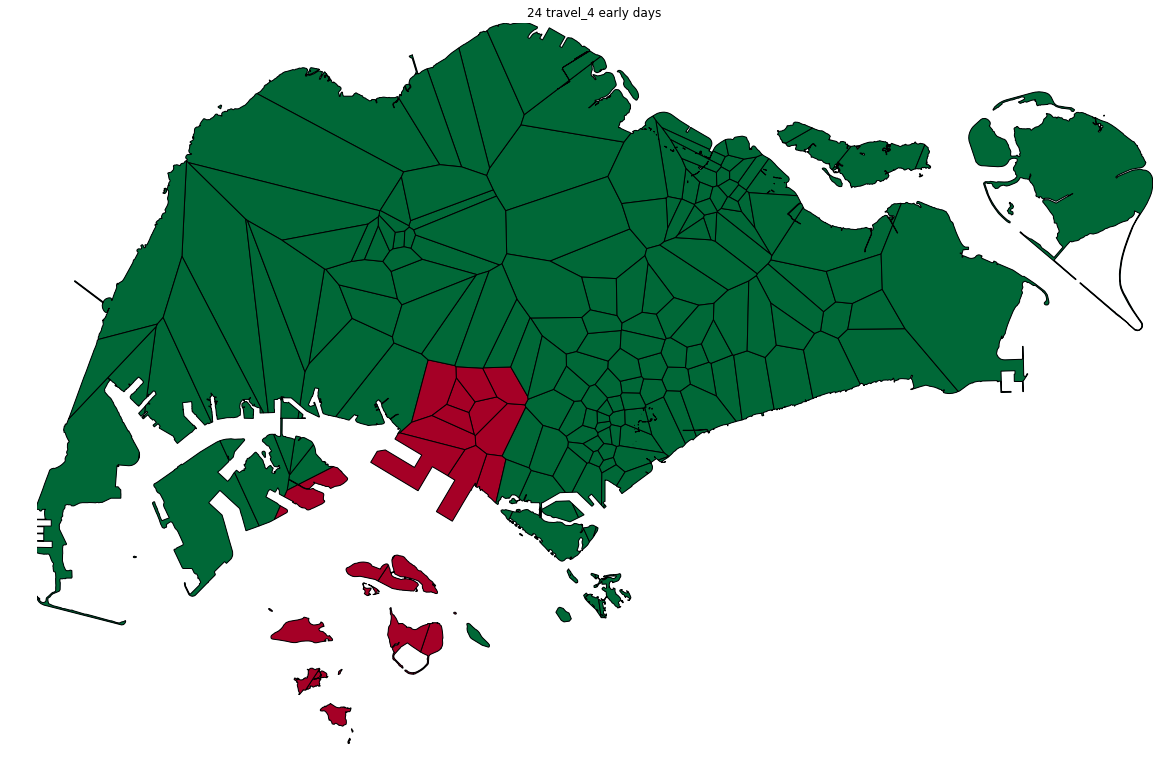

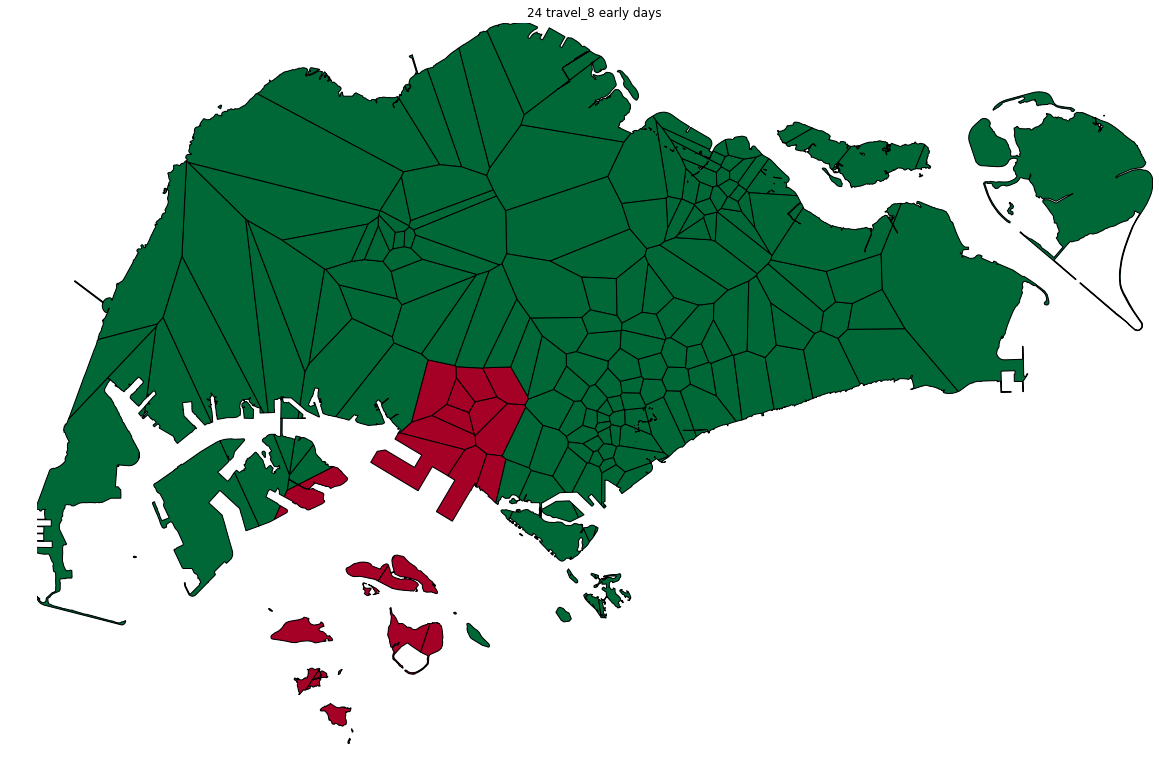

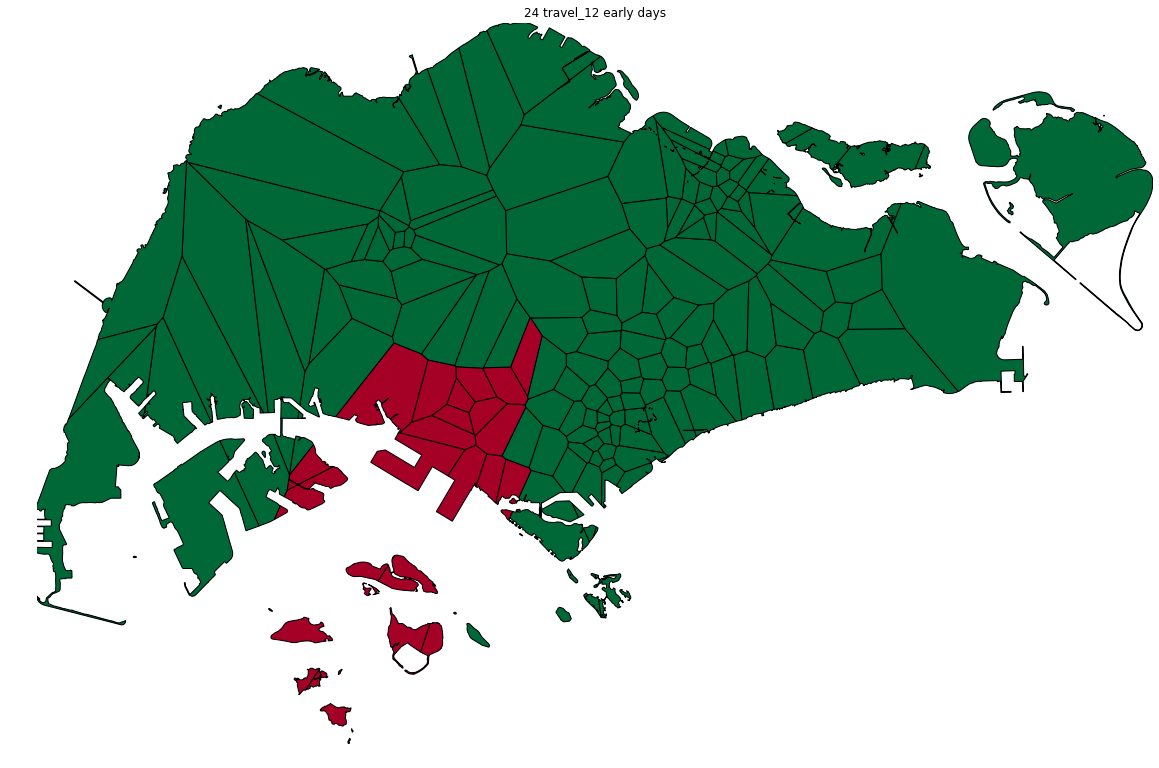

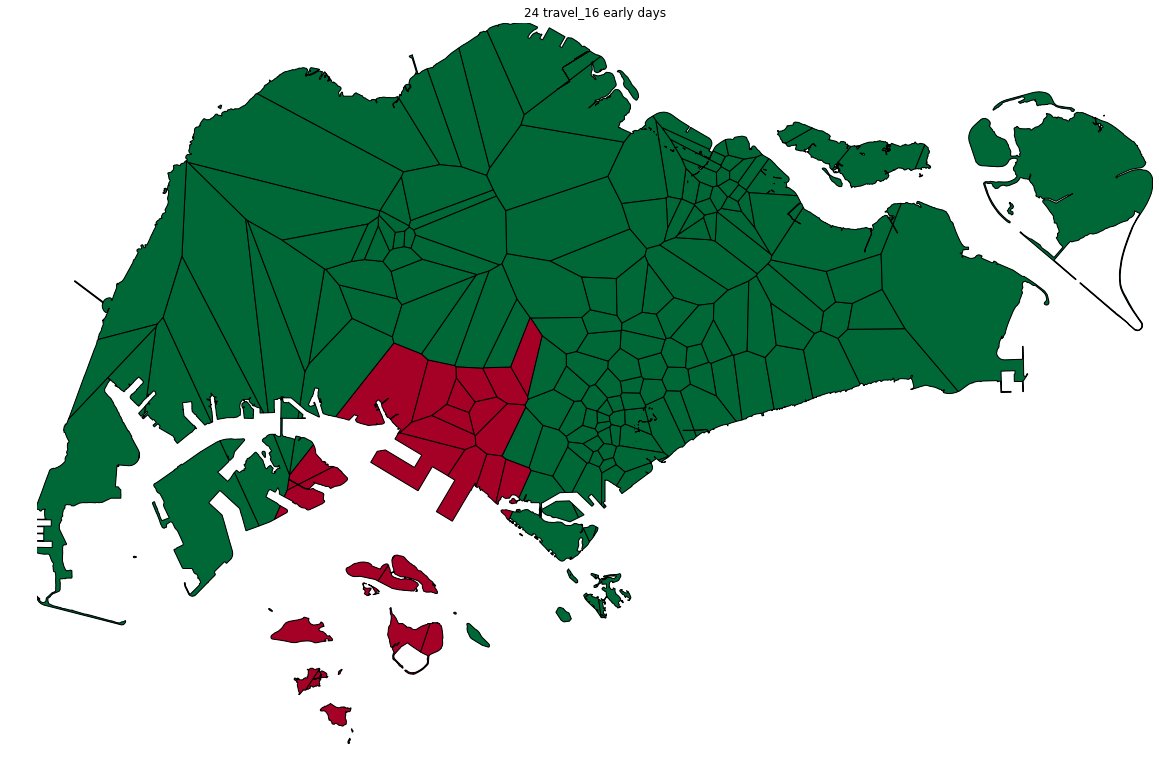

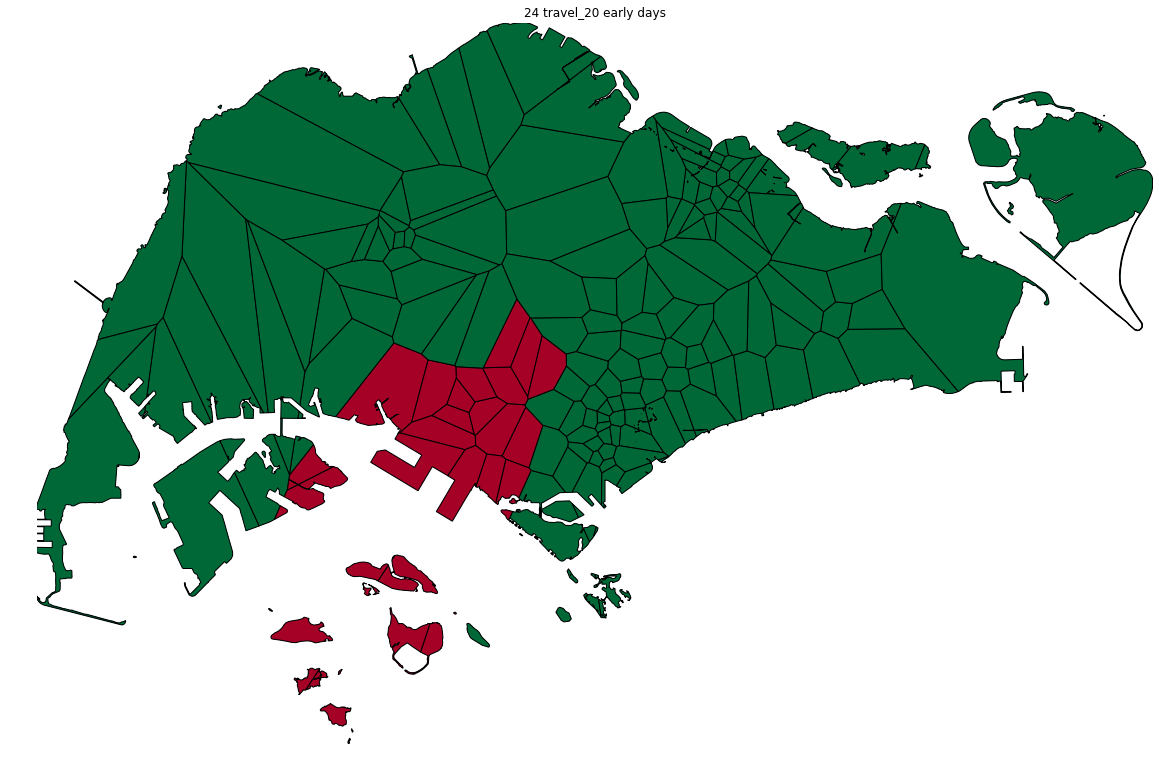

In [34]:
#Generate new CSV for every Estimate
for f in [3,4,5]:
    for early in [0,1,2,3,4,5]:
        if early <= f:
            def checkWorth(row):
                #print(row.NormalPrice*times)
                basePrice =  row.NormalPrice*f*2
                finalPrice = basePrice - early*50
                return finalPrice>4500

            newdf['WorthIt'] = newdf.apply(lambda row: checkWorth(row), axis=1)
            newdf.to_csv('./outdata/'+str(i)+' travel_'+str(early)+' early days.csv')

            fig, ax = plt.subplots(figsize=(20,20))

            geoplot.voronoi(
                newdf,
                ax=ax,
                clip=Background2,
                hue='WorthIt',
                cmap='RdYlGn',
                extent = tuple(Background2.total_bounds),
                #figsize=(20,20)
            )

            ax.set_title(str(i)+' travel_'+str(early)+' early days')
            #newdf.plot(column='assess',cmap='RdYlGn',ax=ax)
            Background2.plot(ax=ax)
            #plt.show()
            fig.savefig('./outdata/'+str(i)+' travel_'+str(early)+' early days')
